In [116]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
from sklearn import datasets
import matplotlib.pyplot as plt

print(sns.get_dataset_names())


['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


In [117]:
data=sns.load_dataset('titanic')
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [118]:
data.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [119]:
data.shape

(891, 15)

In [120]:
data.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [121]:
data.info()
titanic=data.copy()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [122]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [123]:
titanic.shape

(891, 15)

In [124]:
titanic.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [125]:
titanic.duplicated().sum

<bound method Series.sum of 0      False
1      False
2      False
3      False
4      False
       ...  
886     True
887    False
888    False
889    False
890    False
Length: 891, dtype: bool>

In [126]:
titanic['age'].mean()


np.float64(29.69911764705882)

In [127]:
mean = titanic['age'].mean()
titanic['age']=titanic['age'].fillna(mean)

In [128]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [129]:
titanic.dropna(subset=['deck','embark_town','embarked'],inplace=True)

In [130]:
titanic.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

In [131]:
numerical = titanic.select_dtypes(include=['float64', 'int64']).columns
print("Numerical columns:", numerical)


Numerical columns: Index(['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare'], dtype='object')


In [132]:
def remove_outliers(titanic, columns):
    for i in columns:
        Q1 = titanic[i].quantile(0.25)
        Q3 = titanic[i].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        titanic = titanic[(titanic[i] < lower) | (titanic[i] > upper)]
        return titanic

titanic_clean=remove_outliers(titanic, numerical)

In [133]:
titanic['class'] = titanic['class'].str.lower()

In [134]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,first,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,first,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,first,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,first,woman,False,C,Southampton,yes,True


In [135]:
titanic.drop(columns=['who'], inplace=True)

In [136]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,first,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,first,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,first,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,third,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,first,False,C,Southampton,yes,True


In [137]:
titanic.shape

(201, 14)

## Univariate Analysis

In [138]:
for col in numerical:
    print(f"Univariate Summary Statistics for {col} Column:")
    print(f"Mean={titanic[col].mean()}")
    print(f"Mode={titanic[col].mode()}")
    print(f"Median={titanic[col].median()}")
    print(f"Variance={np.var(titanic[col])}")
    print(f"Skewness={titanic[col].skew()}")
    


Univariate Summary Statistics for survived Column:
Mean=0.6666666666666666
Mode=0    1
Name: survived, dtype: int64
Median=1.0
Variance=0.22222222222222243
Skewness=-0.7124345165204936
Univariate Summary Statistics for pclass Column:
Mean=1.199004975124378
Mode=0    1
Name: pclass, dtype: int64
Median=1.0
Variance=0.27880498007475235
Skewness=2.6204393729286917
Univariate Summary Statistics for age Column:
Mean=35.06320017559263
Mode=0    29.699118
Name: age, dtype: float64
Median=33.0
Variance=224.16557847748035
Skewness=0.12615788222765614
Univariate Summary Statistics for sibsp Column:
Mean=0.44776119402985076
Mode=0    0
Name: sibsp, dtype: int64
Median=0.0
Variance=0.39652483849409836
Skewness=1.463360023572434
Univariate Summary Statistics for parch Column:
Mean=0.4427860696517413
Mode=0    0
Name: parch, dtype: int64
Median=0.0
Variance=0.5352837801044547
Skewness=1.6207803046661102
Univariate Summary Statistics for fare Column:
Mean=76.30530746268657
Mode=0    26.55
Name: fare,

In [139]:
categorical = titanic.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical)

Categorical columns: Index(['sex', 'embarked', 'class', 'embark_town', 'alive'], dtype='object')


In [140]:
for col in categorical:
    print(f"Frequency distribution for {col}:")
    print(titanic[col].value_counts())
    print("\n")


Frequency distribution for sex:
sex
male      106
female     95
Name: count, dtype: int64


Frequency distribution for embarked:
embarked
S    128
C     69
Q      4
Name: count, dtype: int64


Frequency distribution for class:
class
first     173
second     16
third      12
Name: count, dtype: int64


Frequency distribution for embark_town:
embark_town
Southampton    128
Cherbourg       69
Queenstown       4
Name: count, dtype: int64


Frequency distribution for alive:
alive
yes    134
no      67
Name: count, dtype: int64




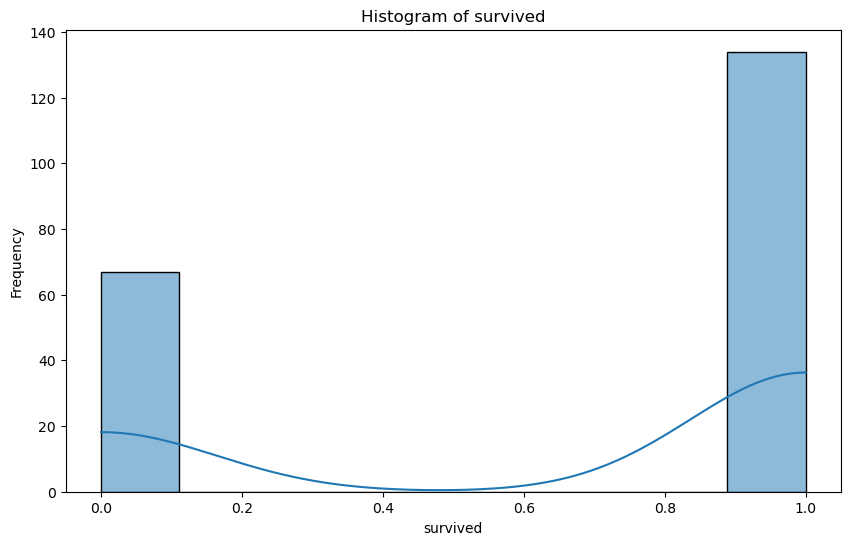

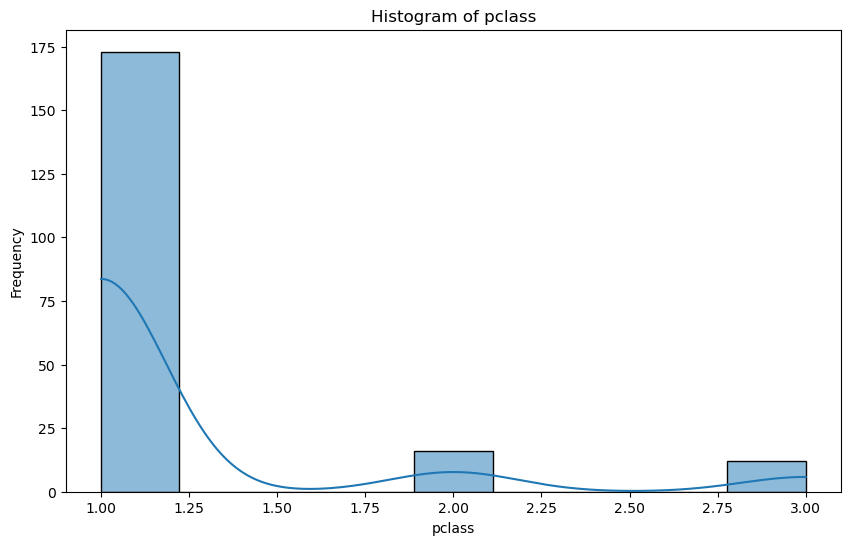

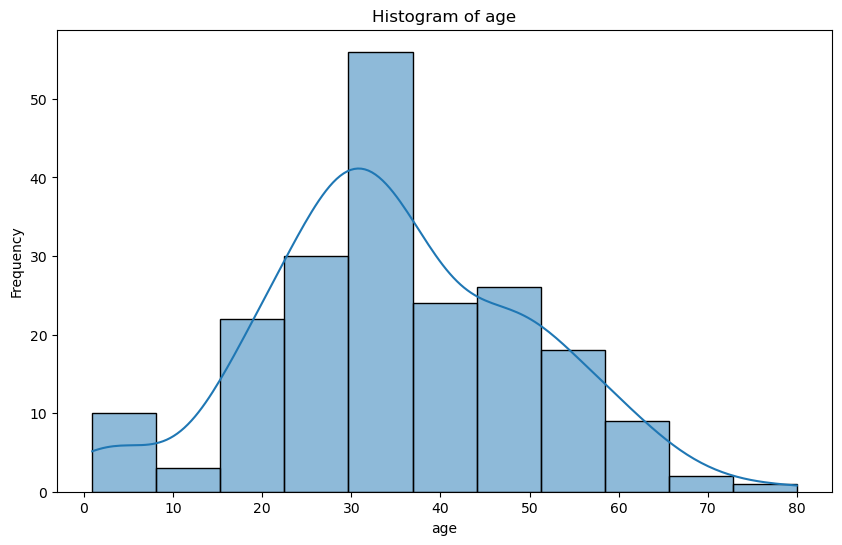

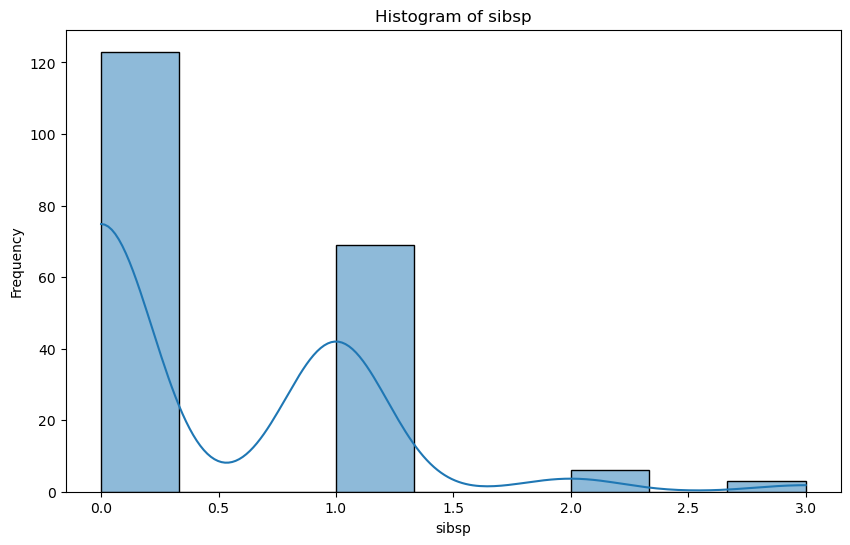

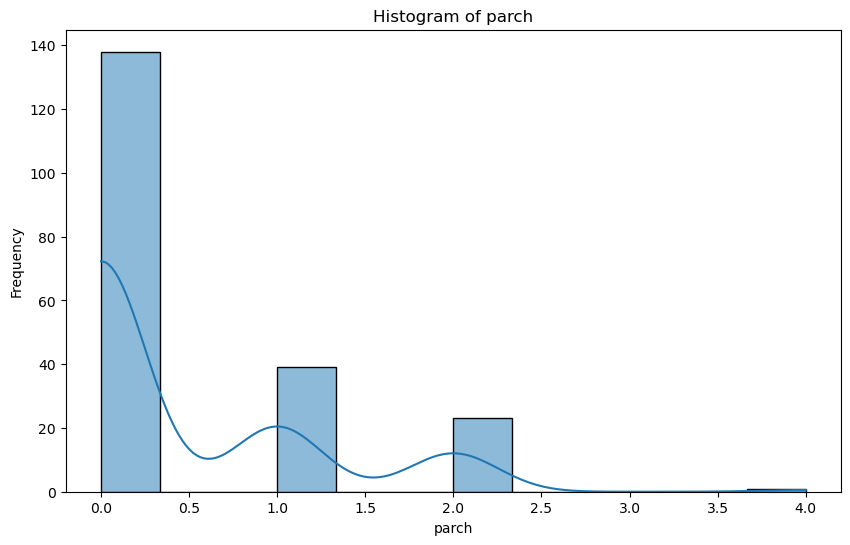

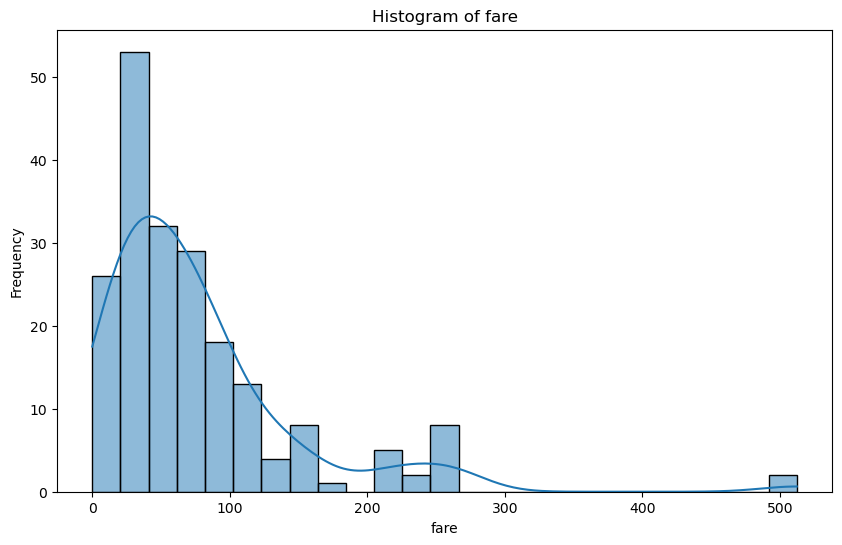

In [141]:
import matplotlib.pyplot as plt
# Histogram
for col in numerical:
        plt.figure(figsize=(10, 6))
        sns.histplot(titanic[col], kde=True)
        plt.title(f'Histogram of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        

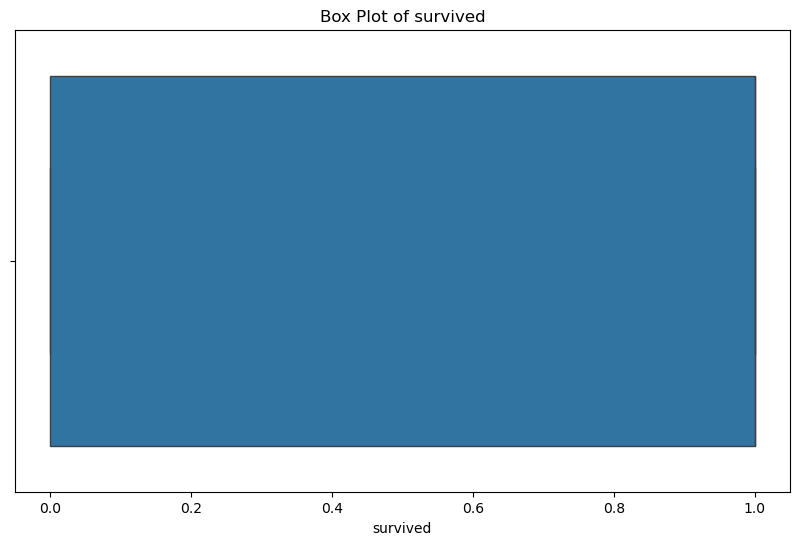

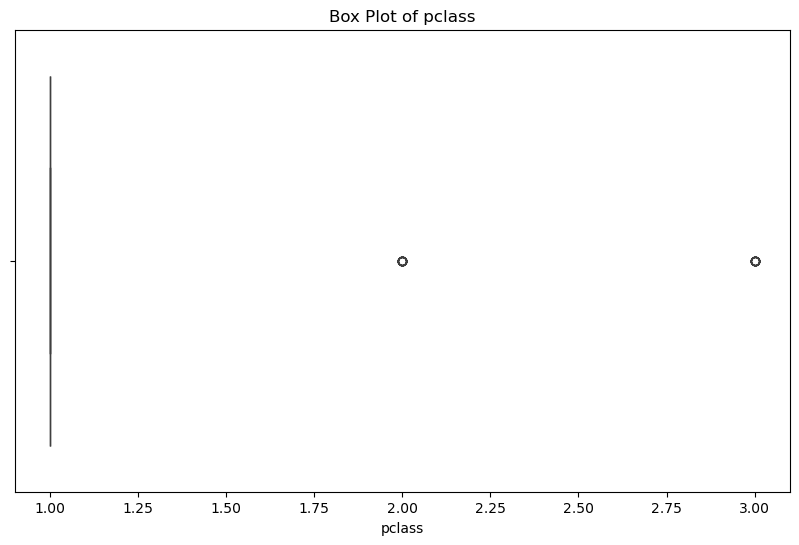

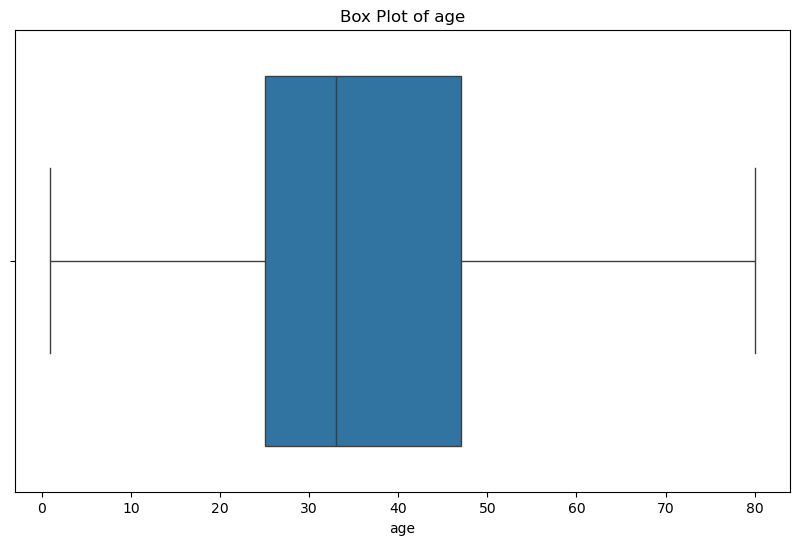

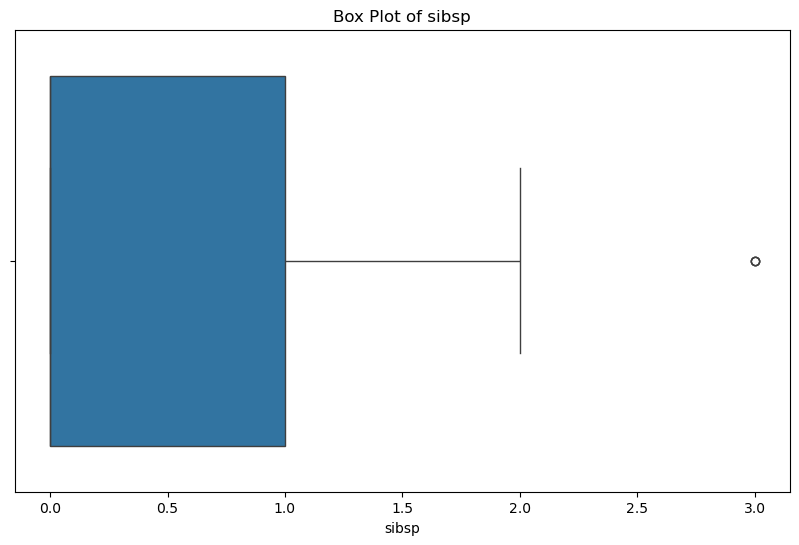

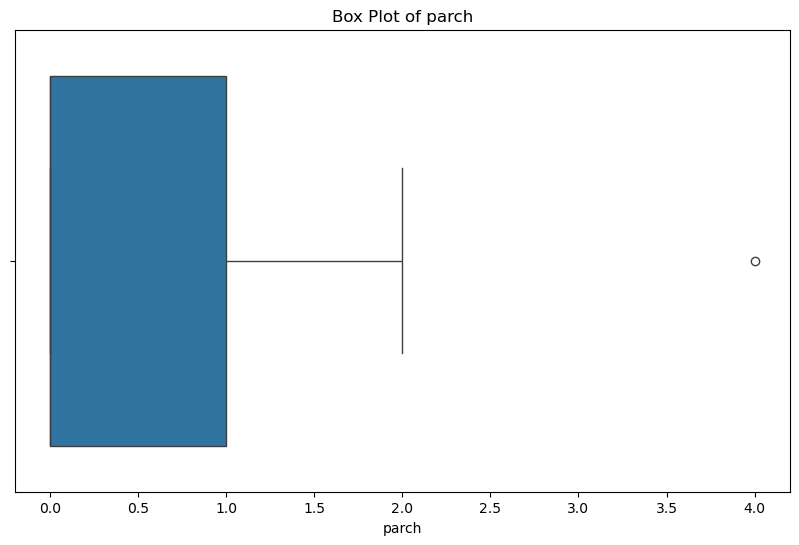

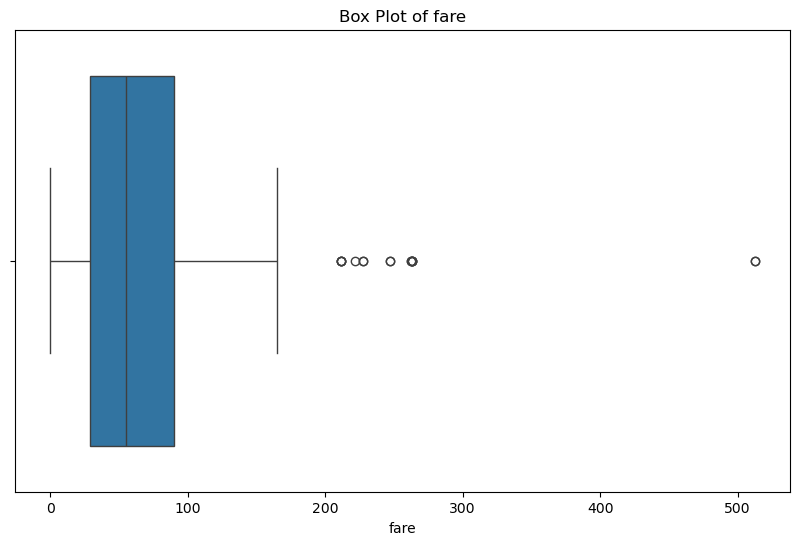

In [142]:
#Boxplot
for col in numerical:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=titanic[col])
        plt.title(f'Box Plot of {col}')
        plt.xlabel(col)
        

## Bivariate Analysis

In [143]:
print(titanic[numerical].corr())

          survived    pclass       age     sibsp     parch      fare
survived  1.000000 -0.033313 -0.228639  0.134080  0.038467  0.125166
pclass   -0.033313  1.000000 -0.286359 -0.088438  0.055230 -0.313099
age      -0.228639 -0.286359  1.000000 -0.137873 -0.245432 -0.075026
sibsp     0.134080 -0.088438 -0.137873  1.000000  0.260784  0.290435
parch     0.038467  0.055230 -0.245432  0.260784  1.000000  0.383967
fare      0.125166 -0.313099 -0.075026  0.290435  0.383967  1.000000


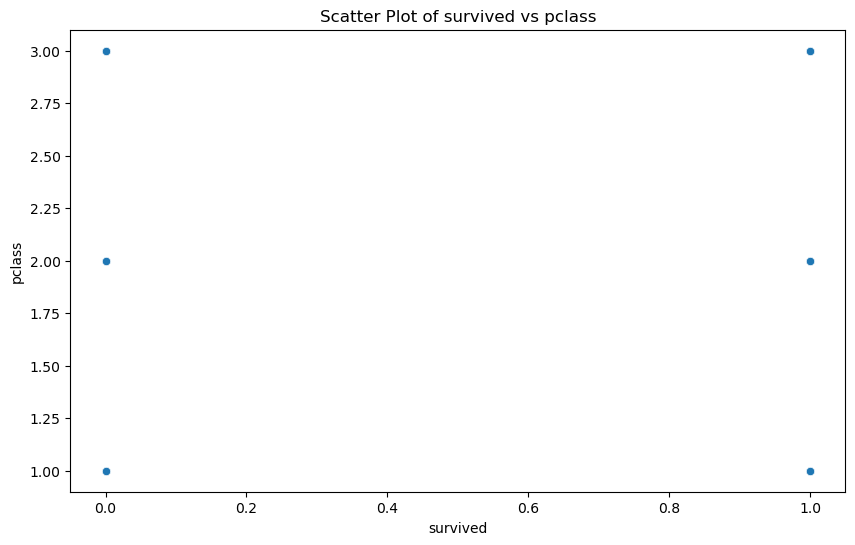

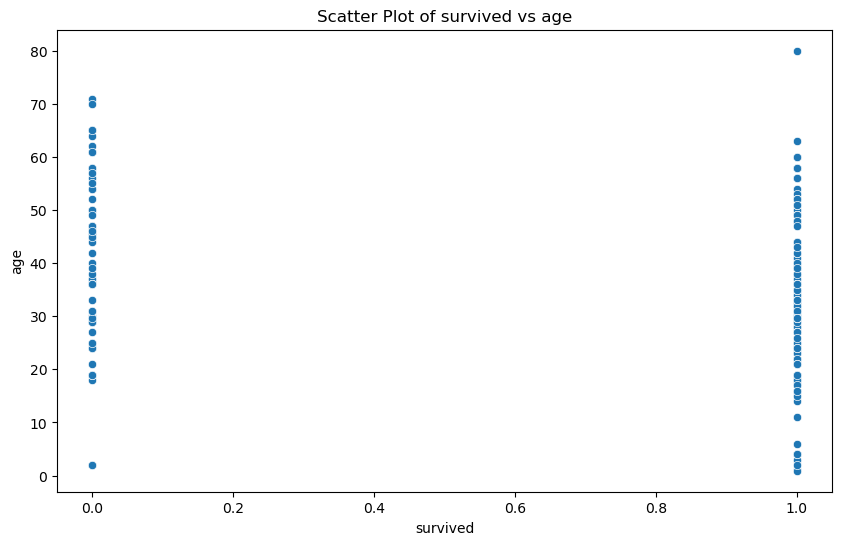

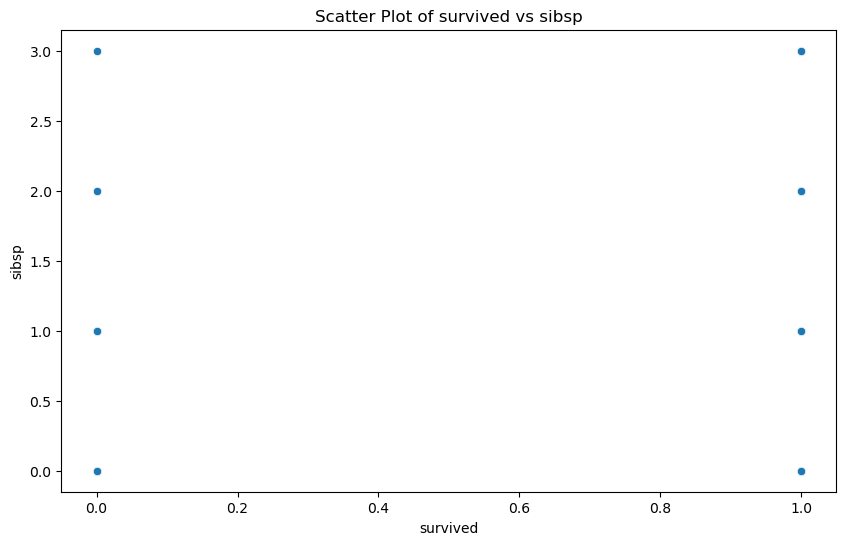

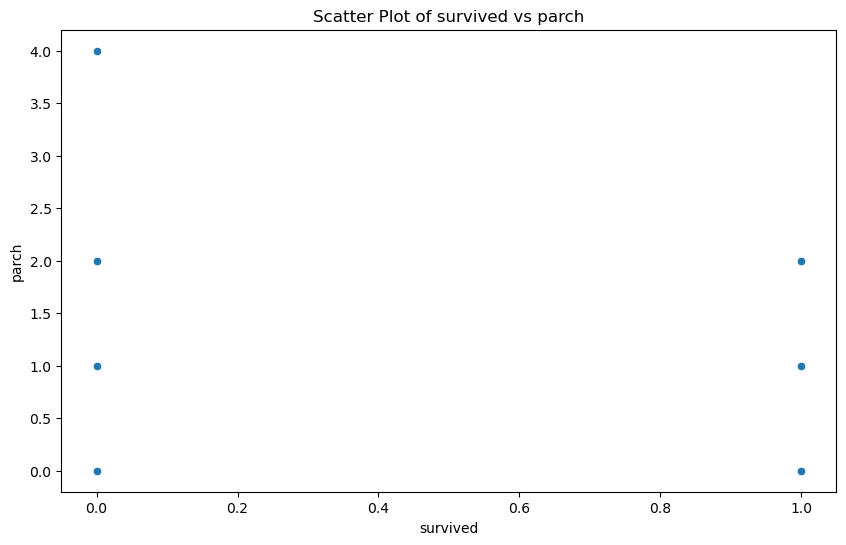

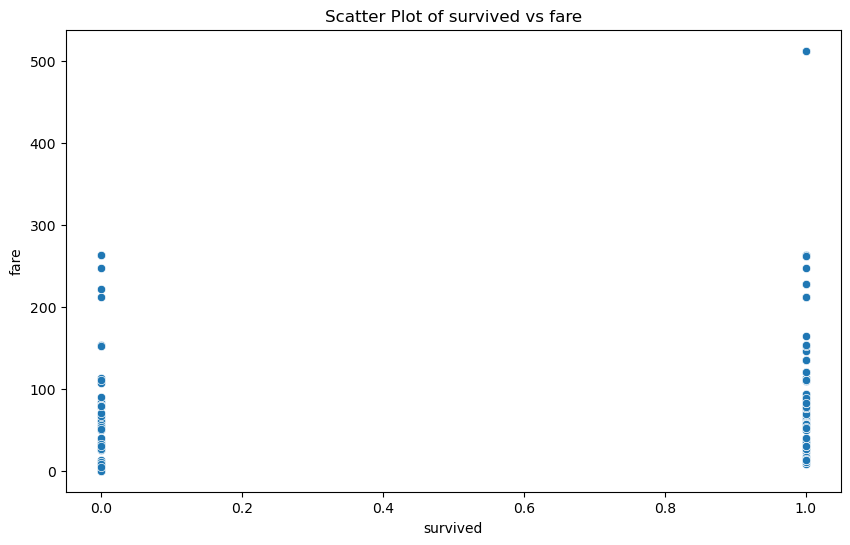

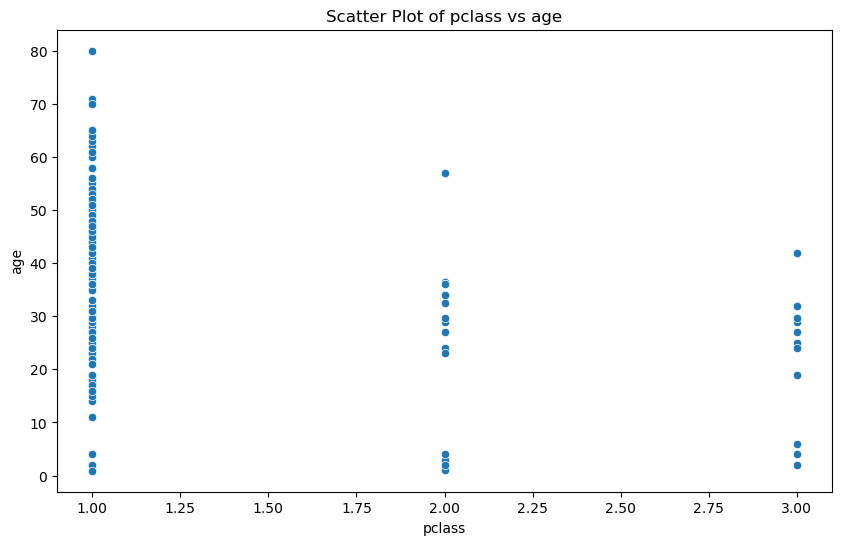

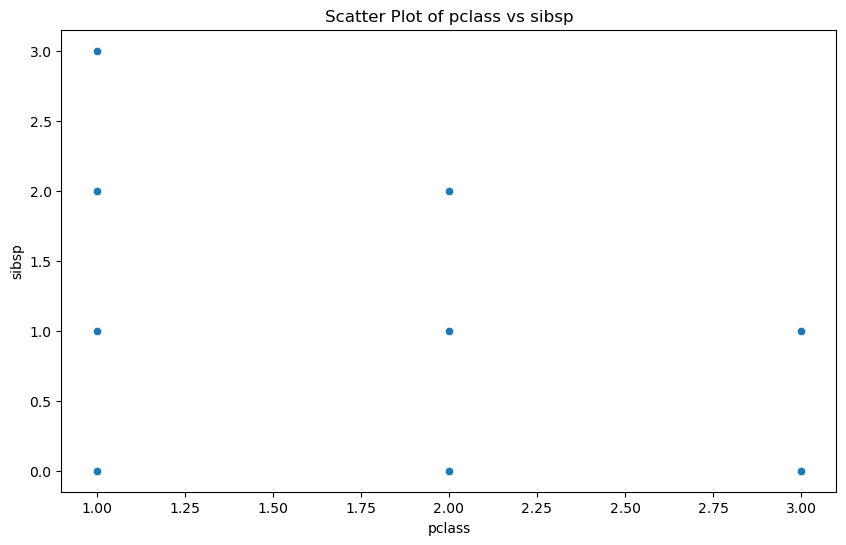

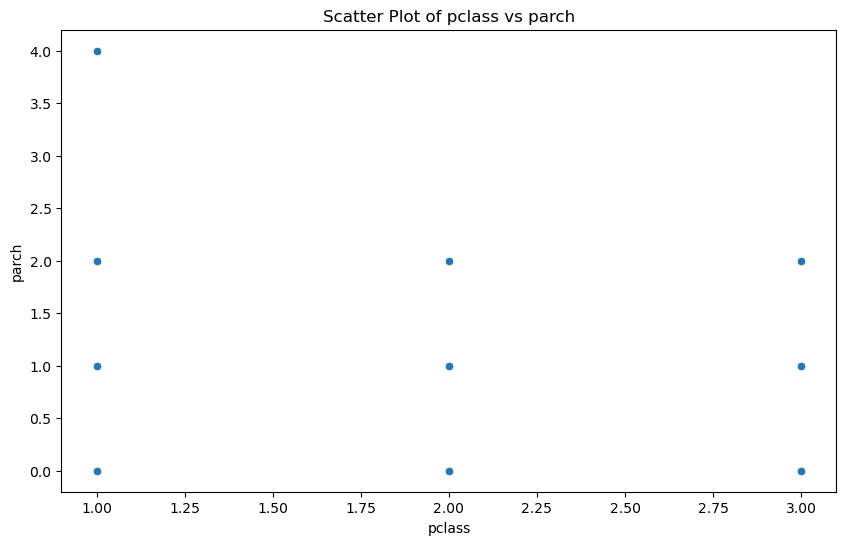

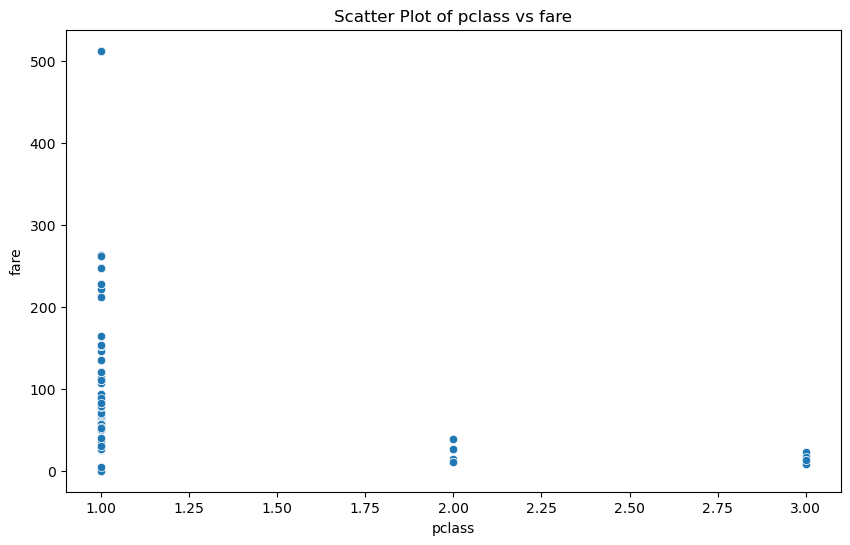

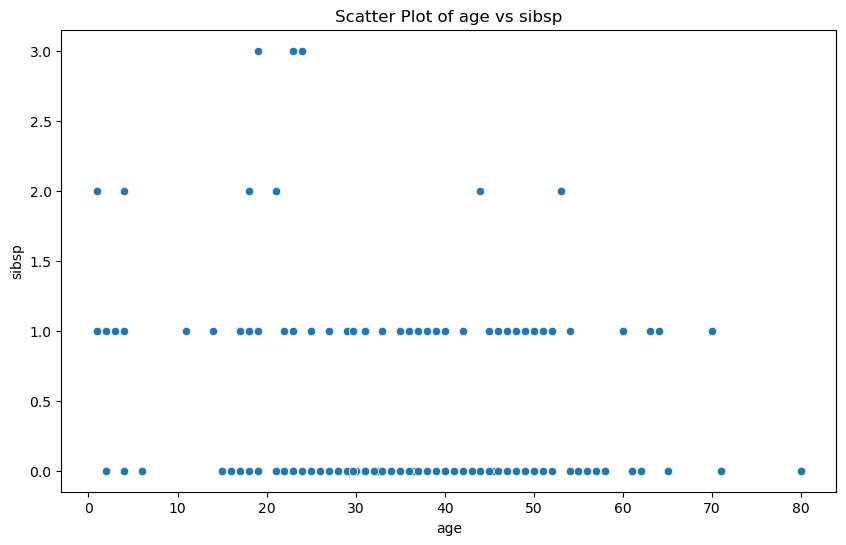

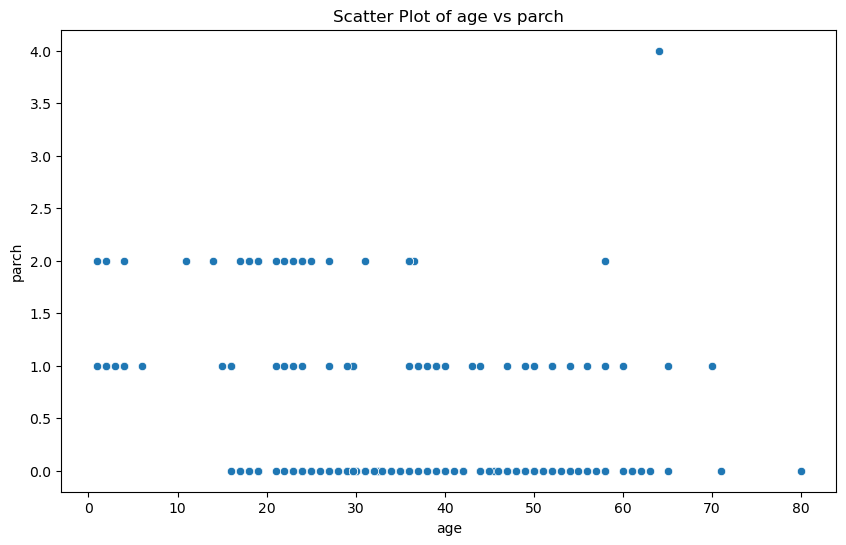

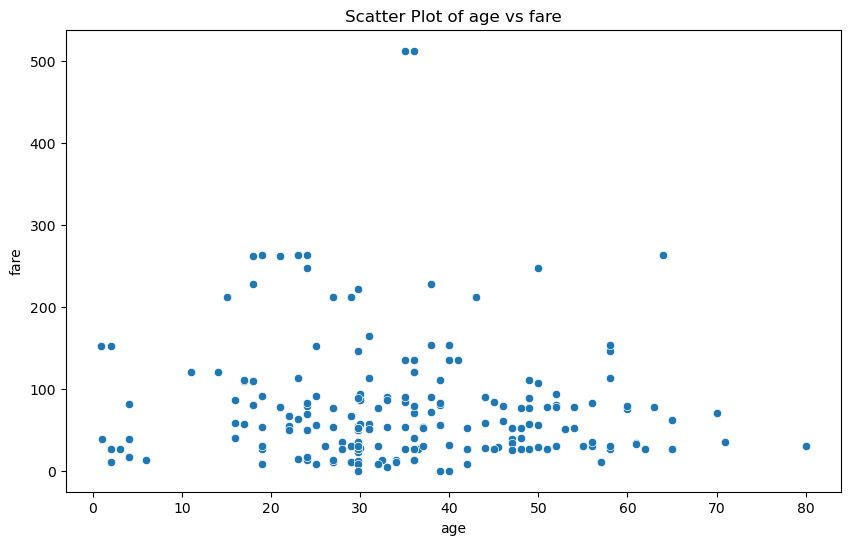

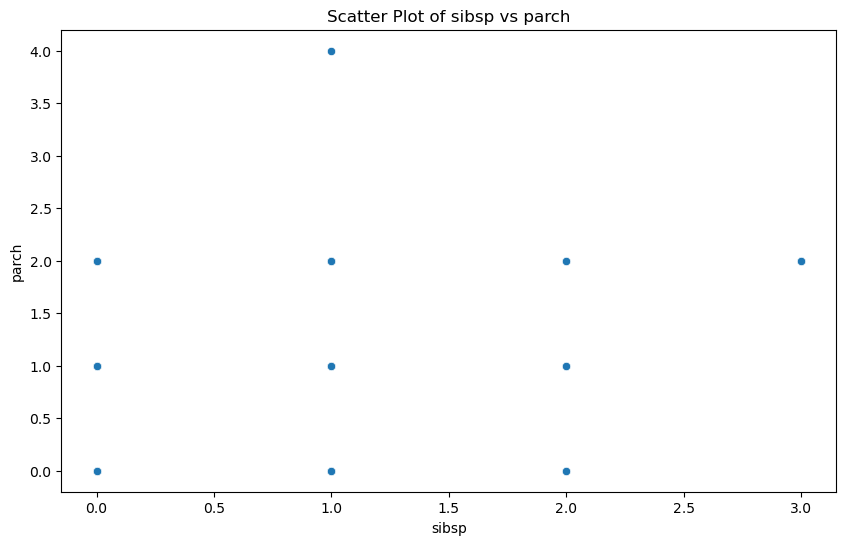

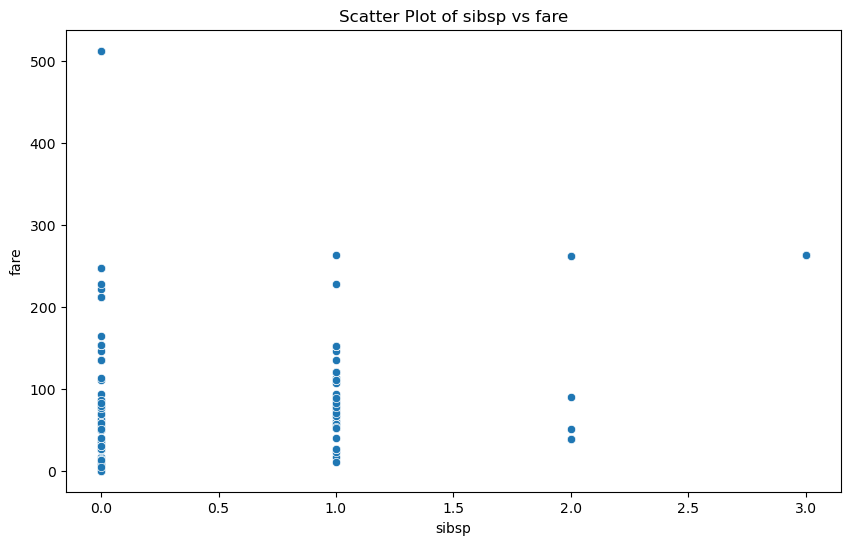

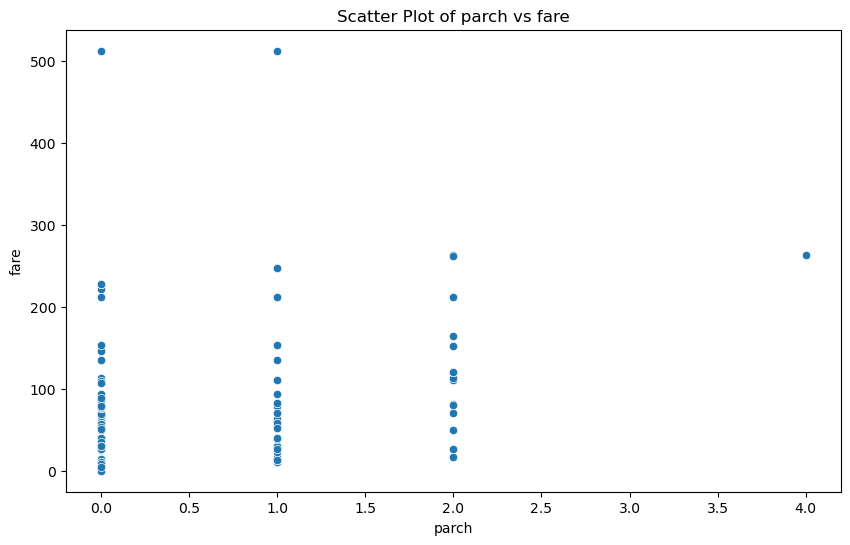

In [144]:
for i, col1 in enumerate(numerical):
        for j, col2 in enumerate(numerical):
            if i < j: 
                plt.figure(figsize=(10, 6))
                sns.scatterplot(x=titanic[col1], y=titanic[col2])
                plt.title(f'Scatter Plot of {col1} vs {col2}')
                plt.xlabel(col1)
                plt.ylabel(col2)
                plt.show()

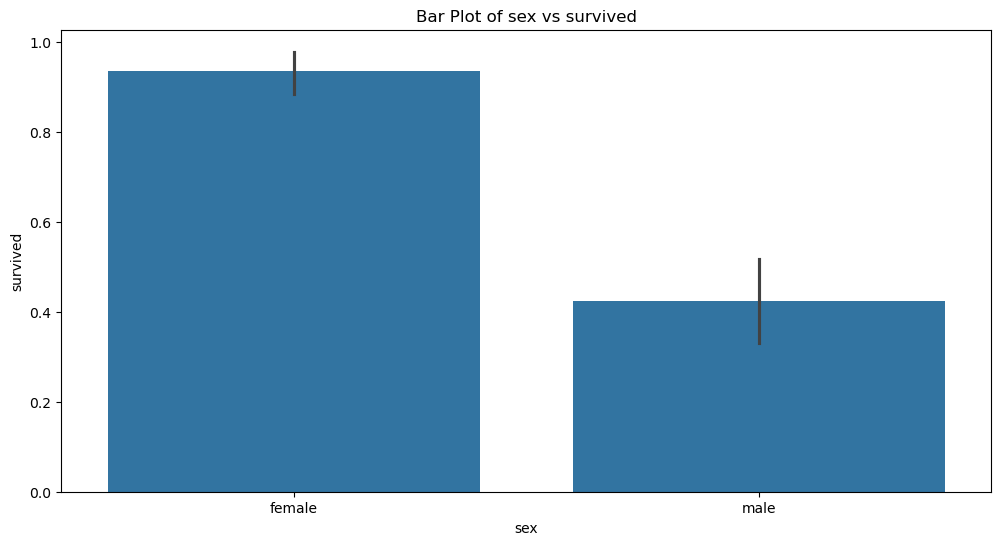

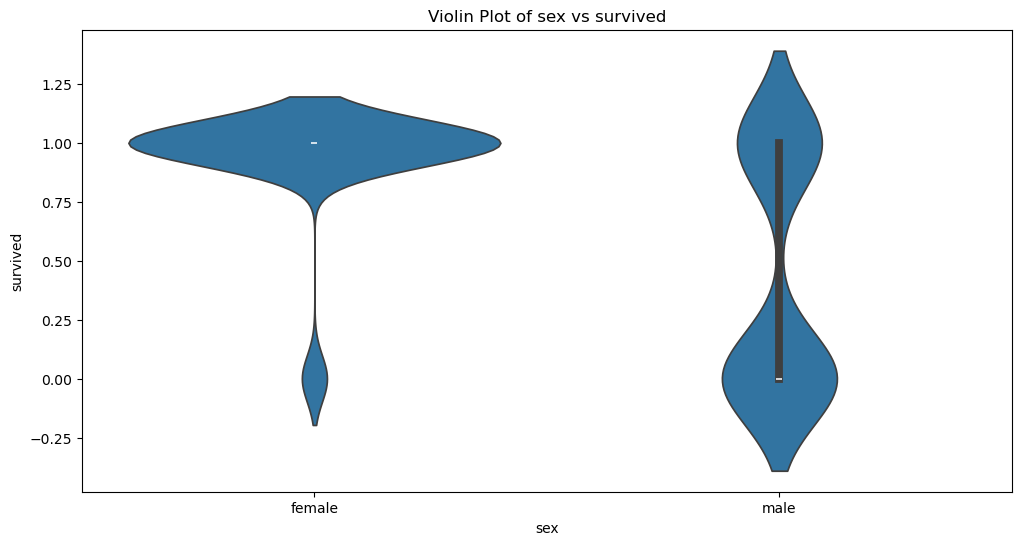

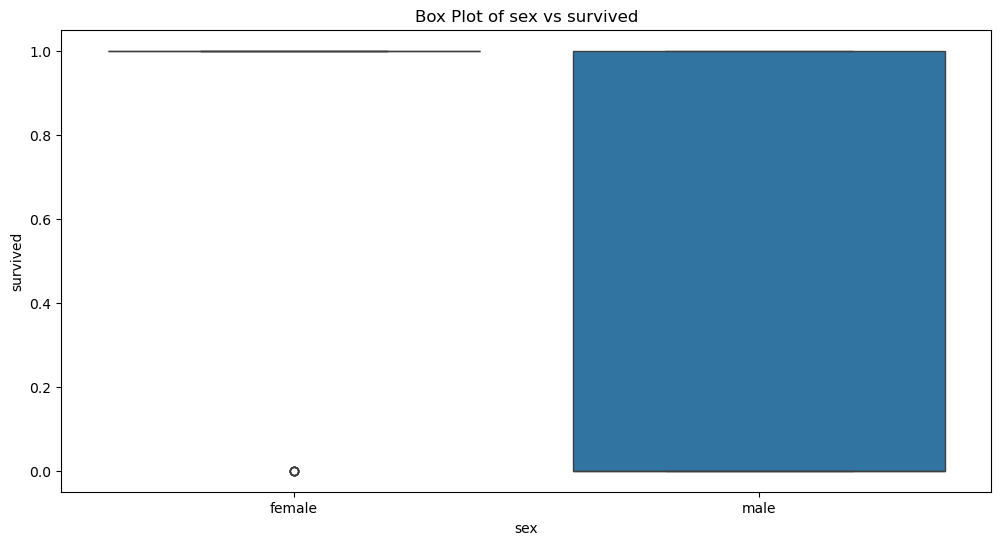

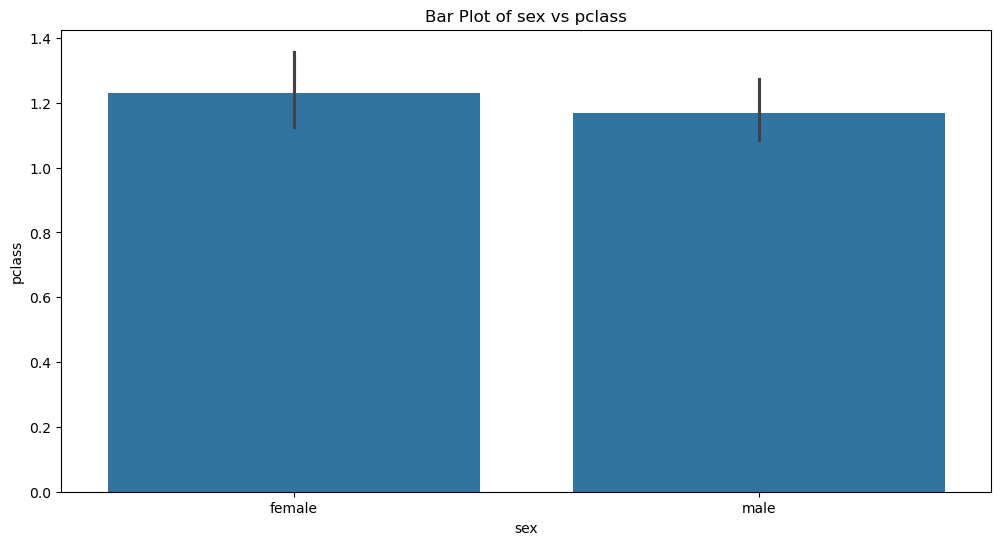

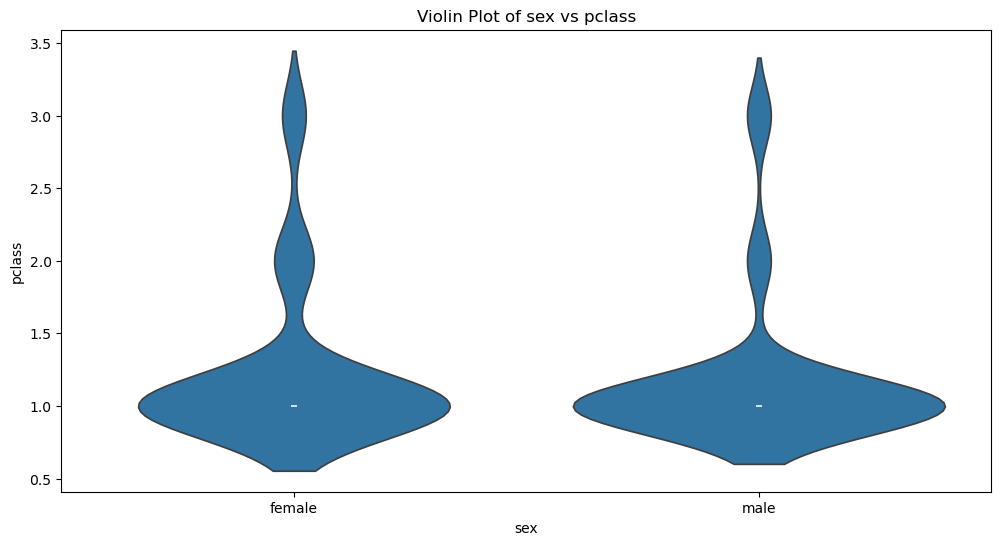

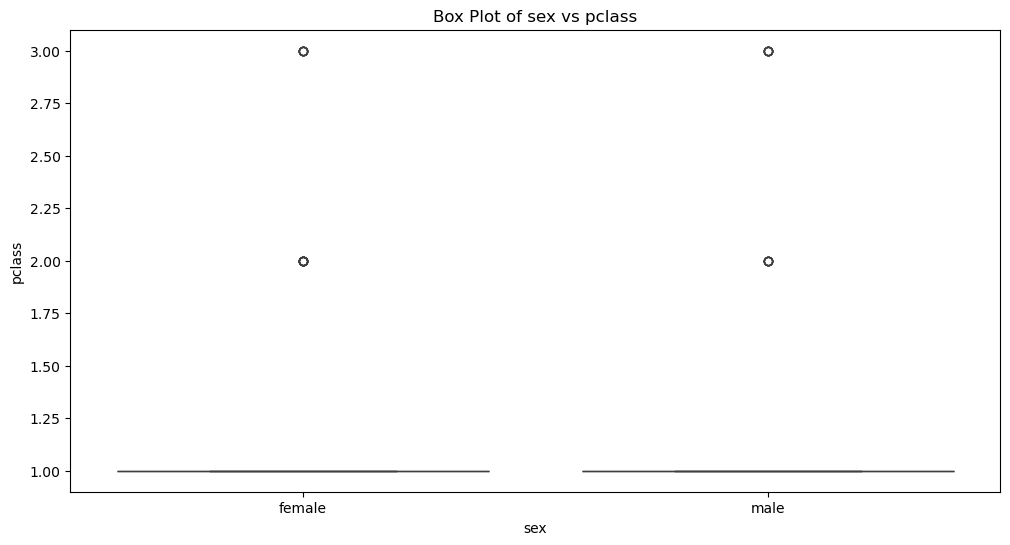

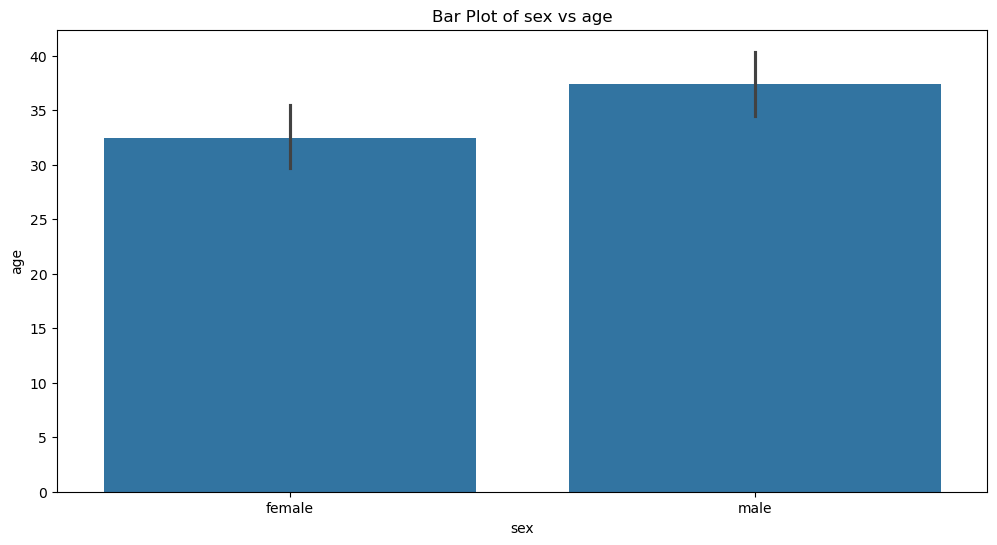

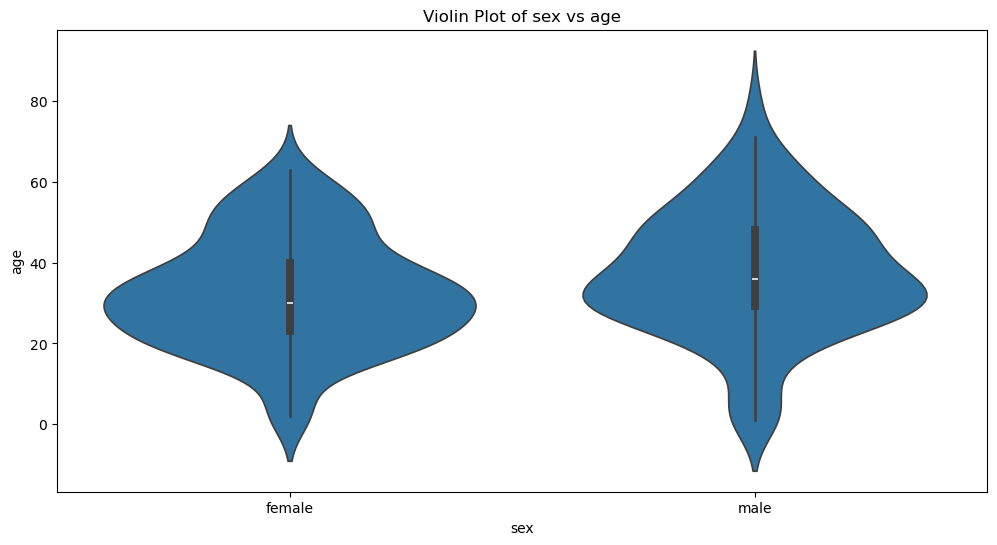

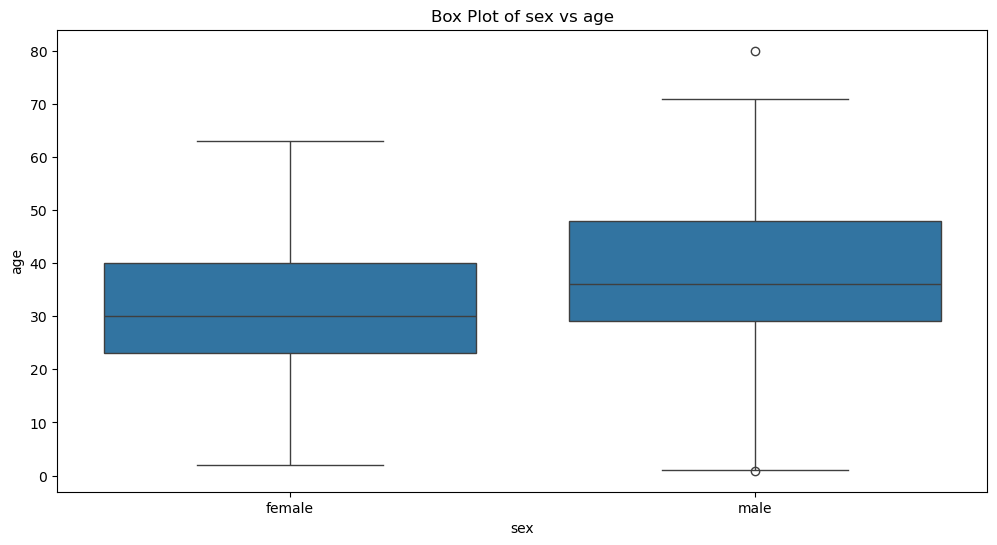

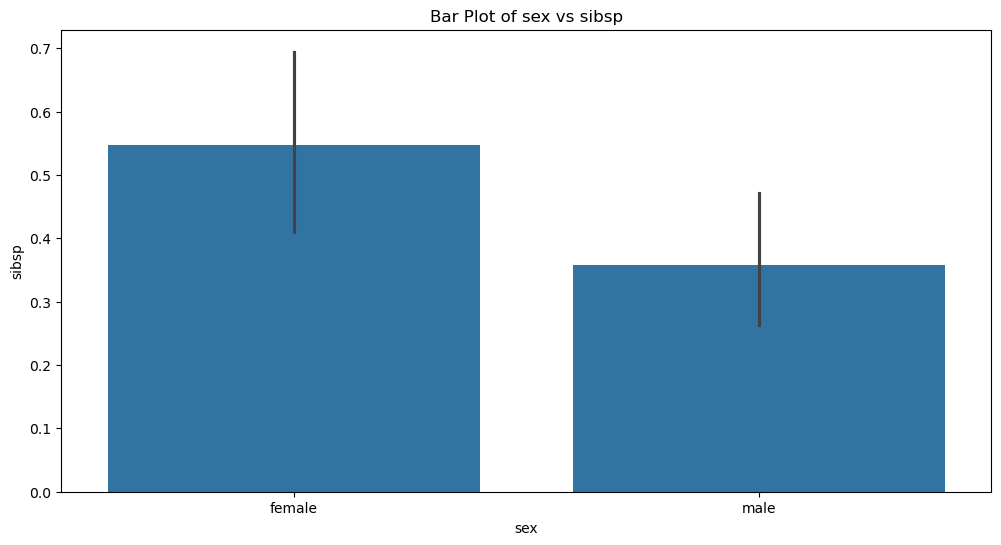

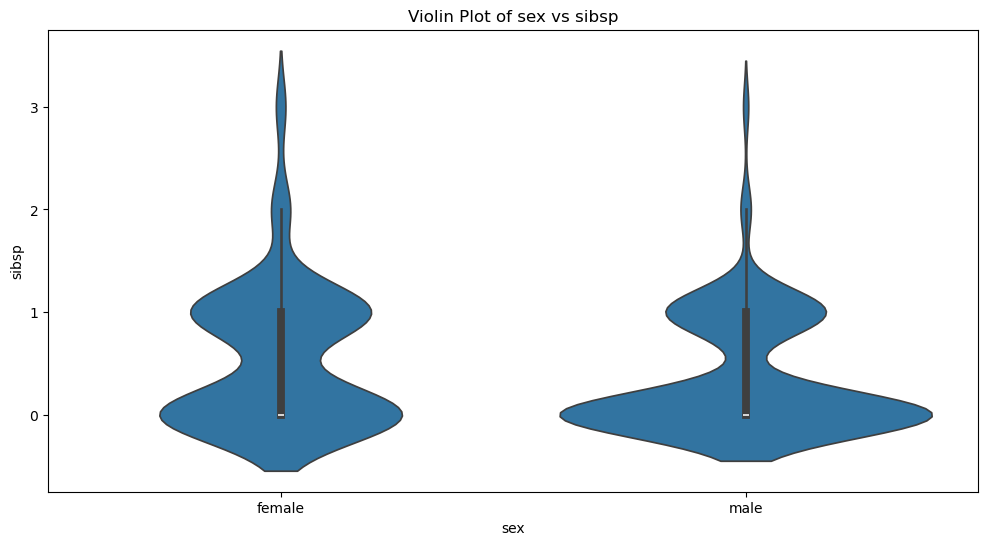

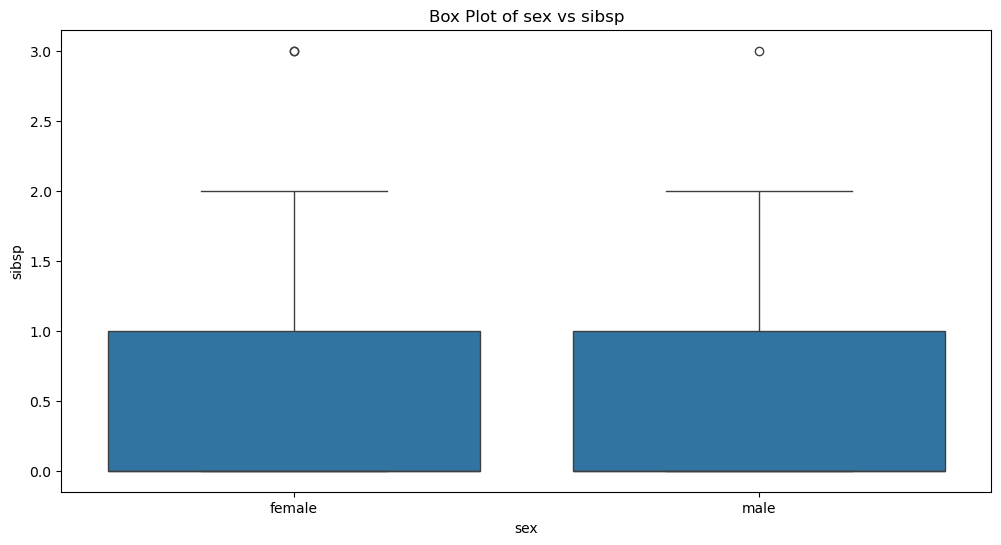

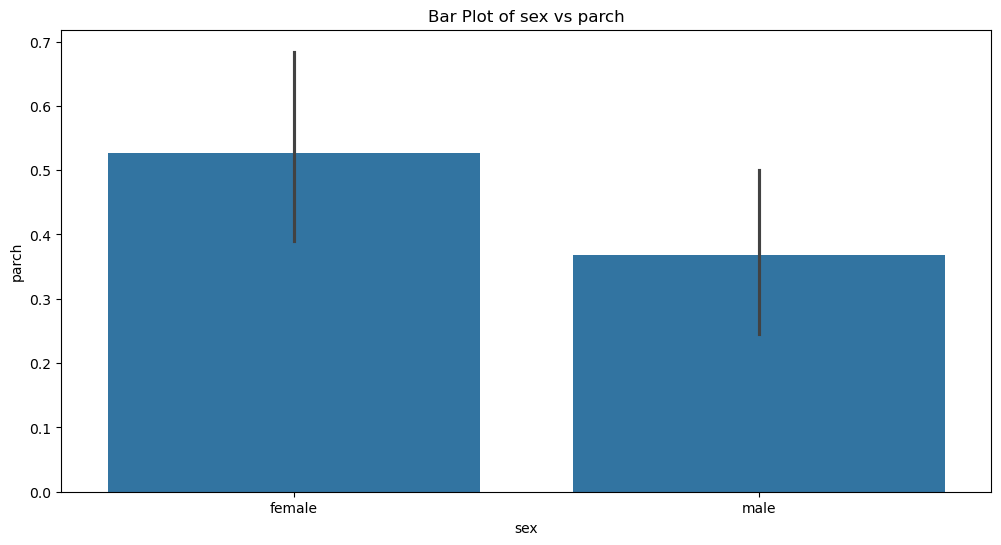

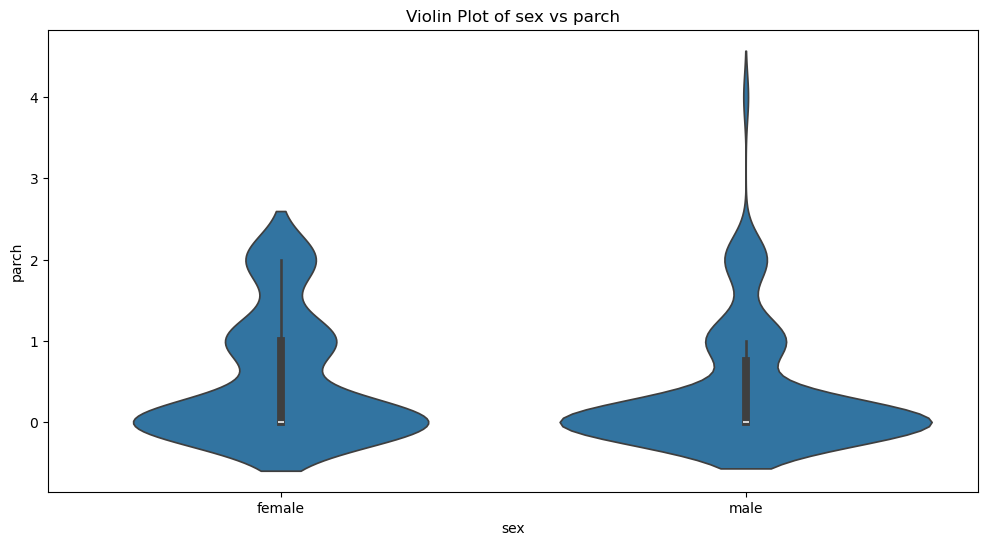

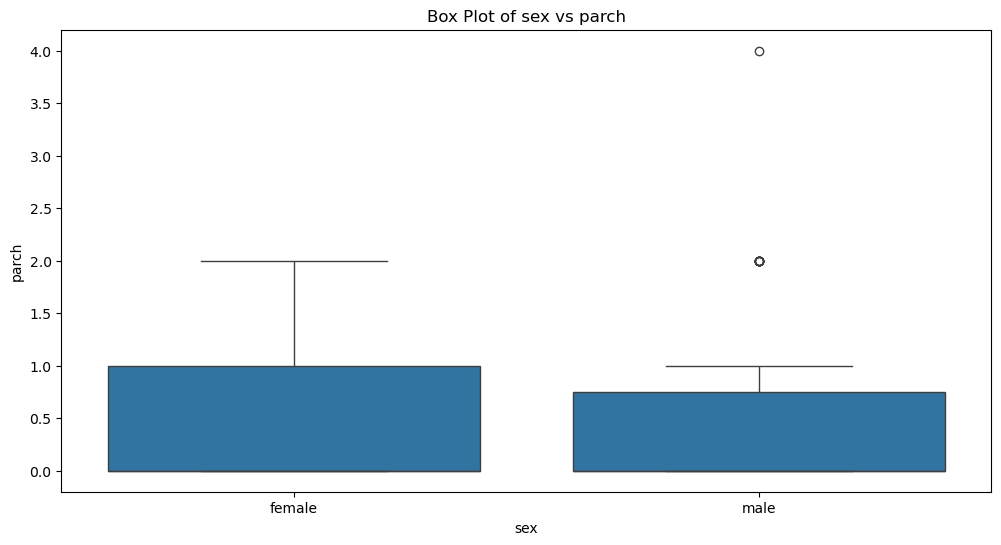

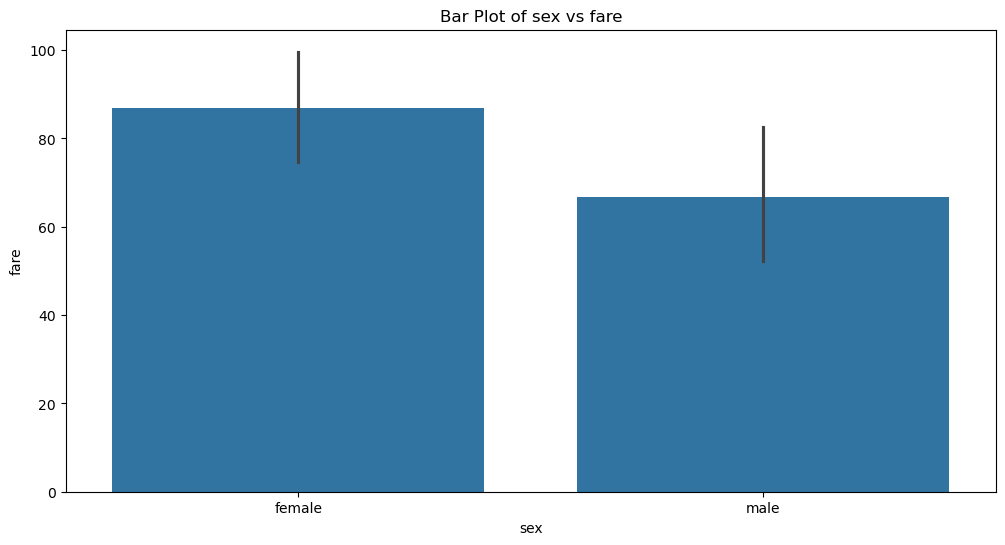

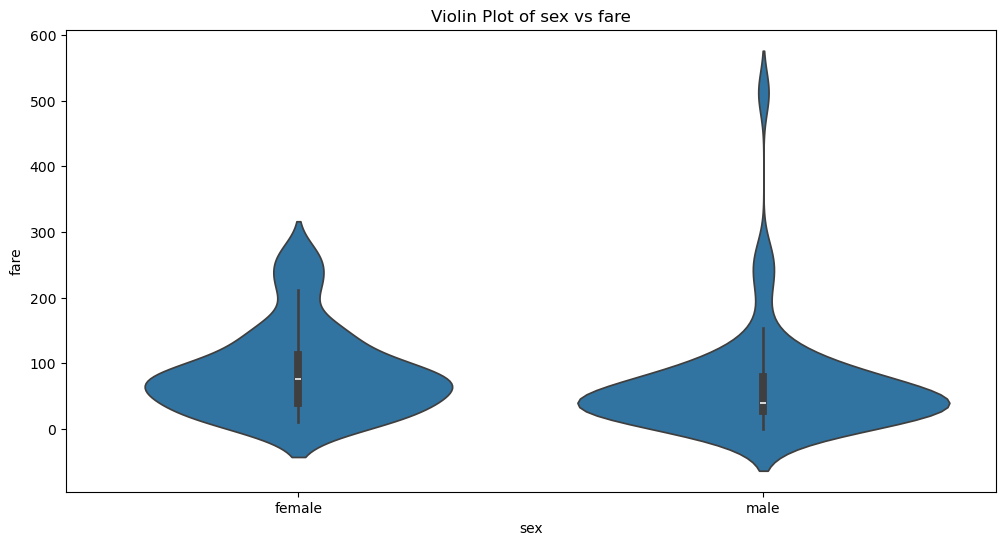

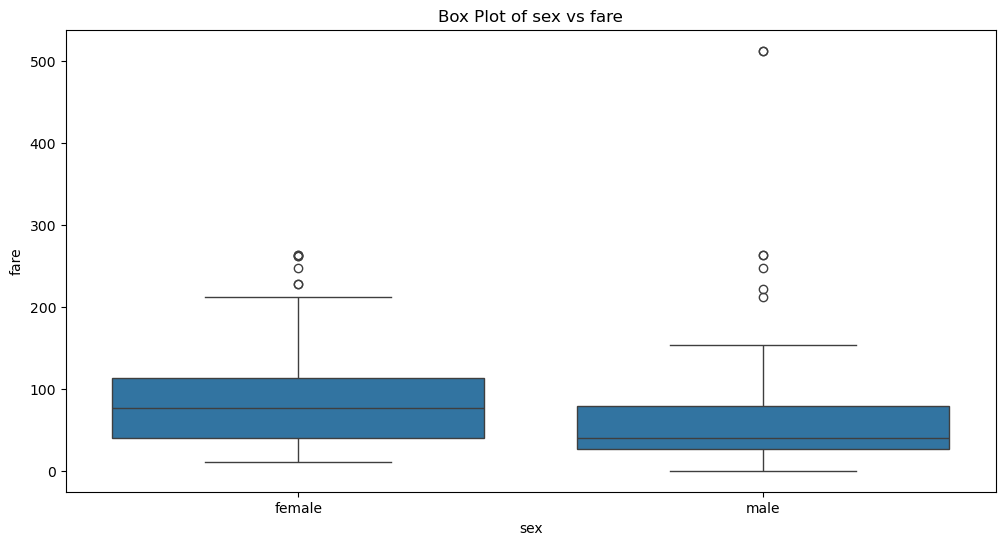

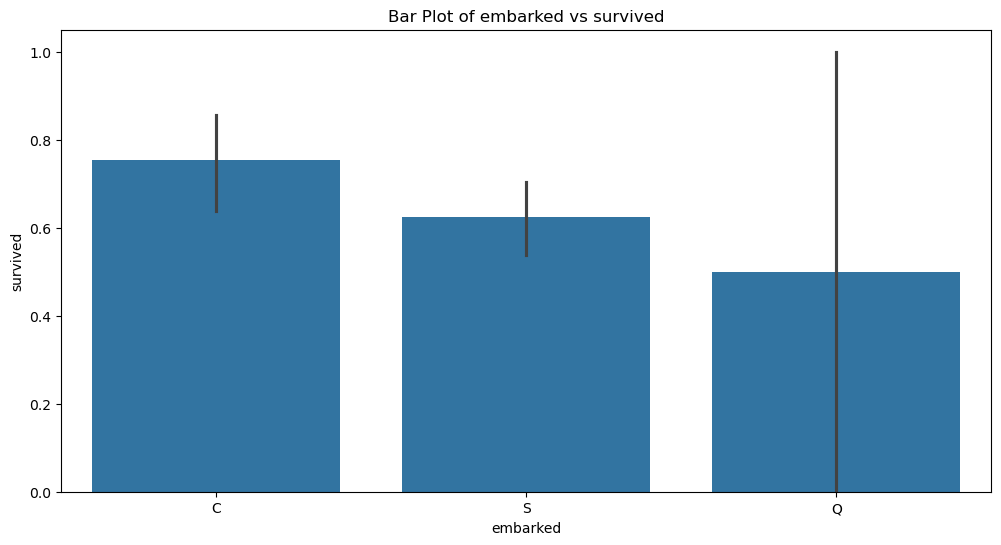

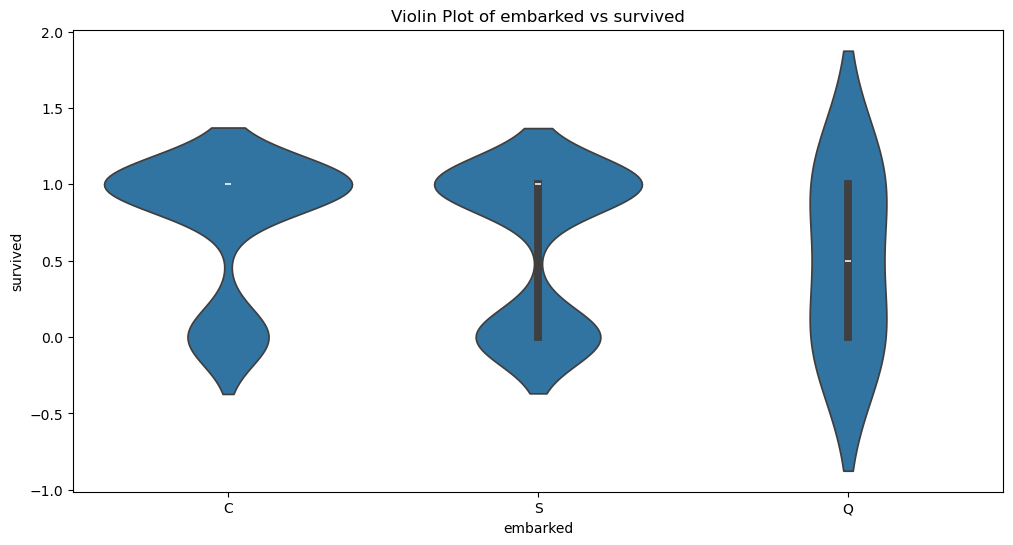

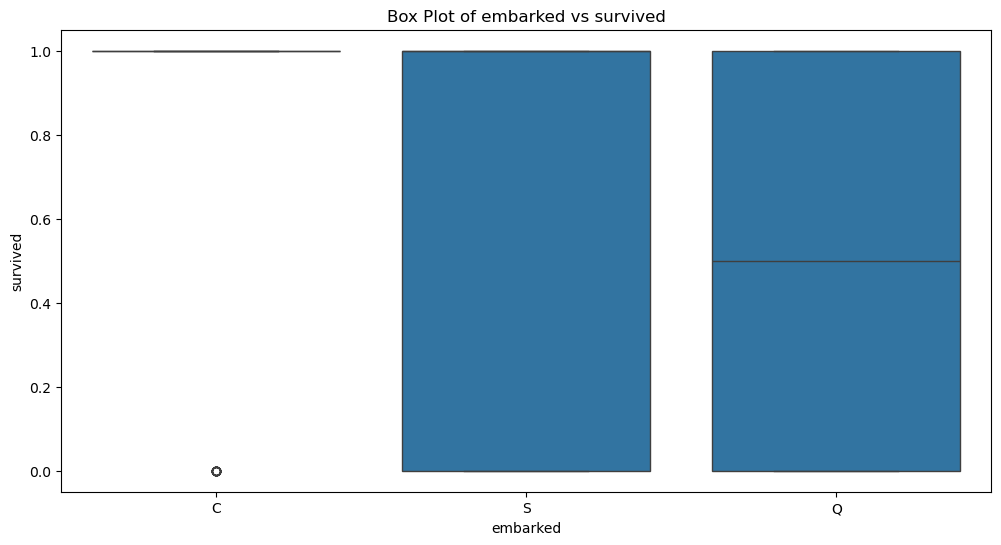

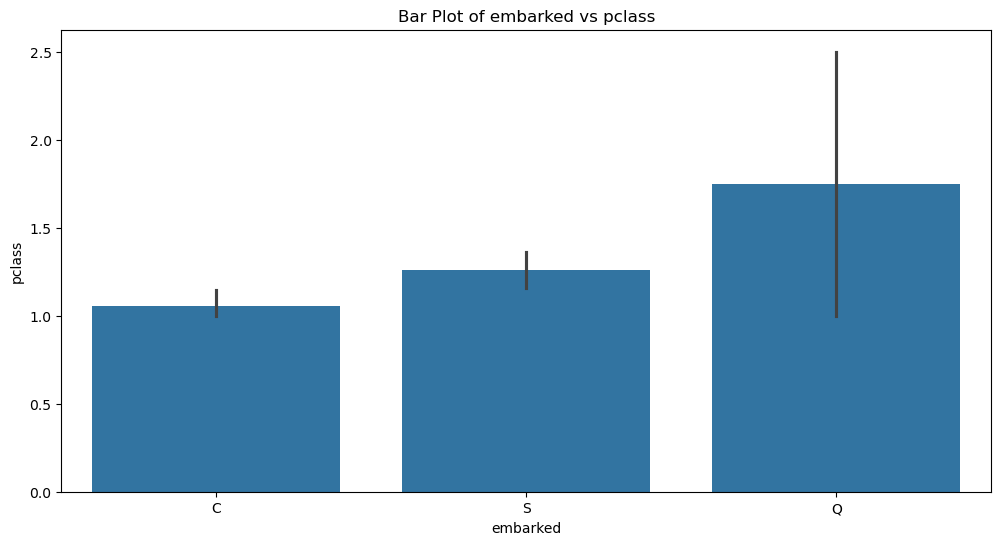

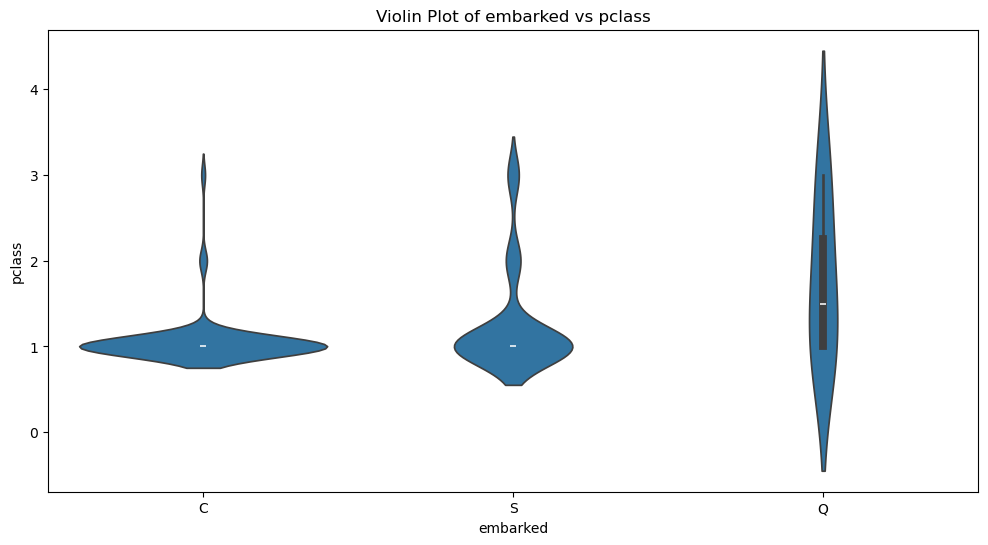

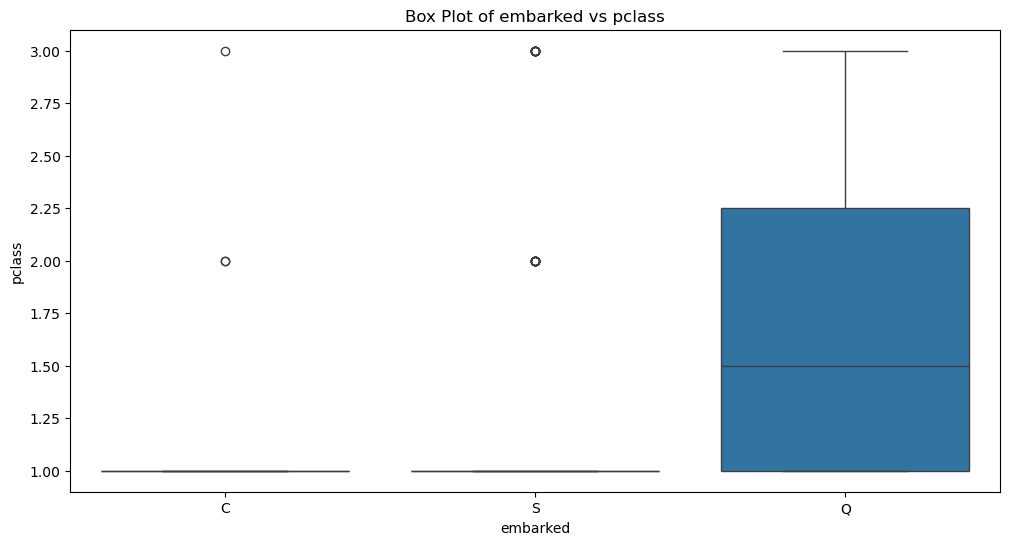

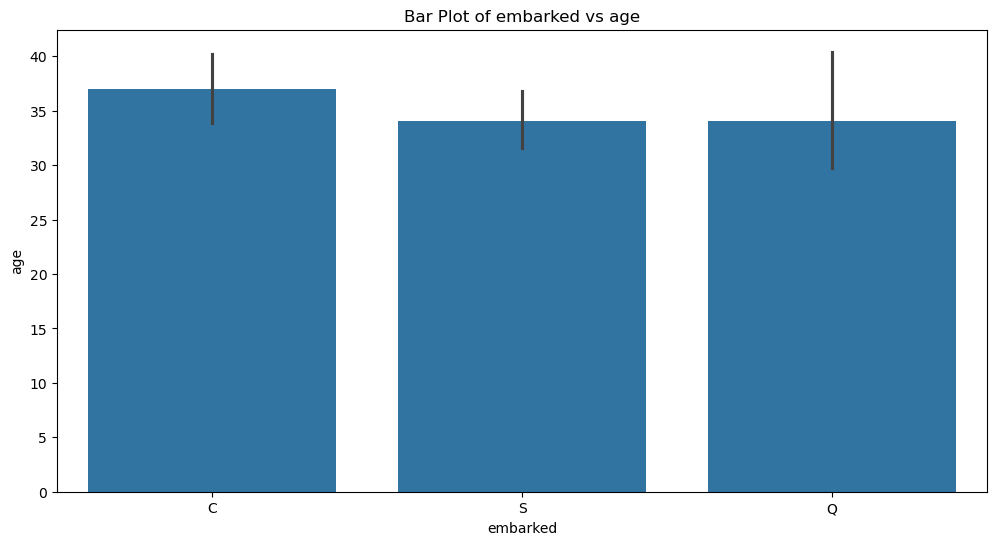

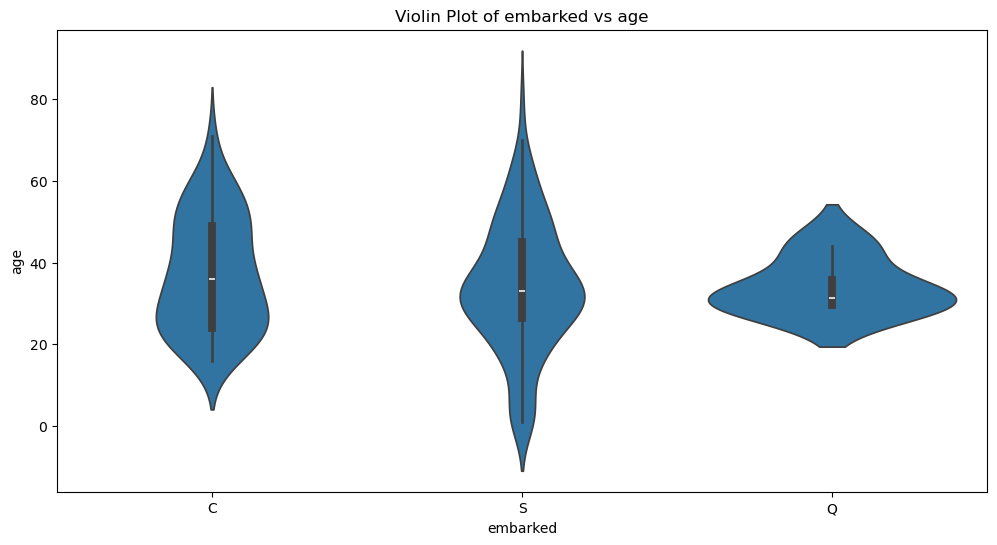

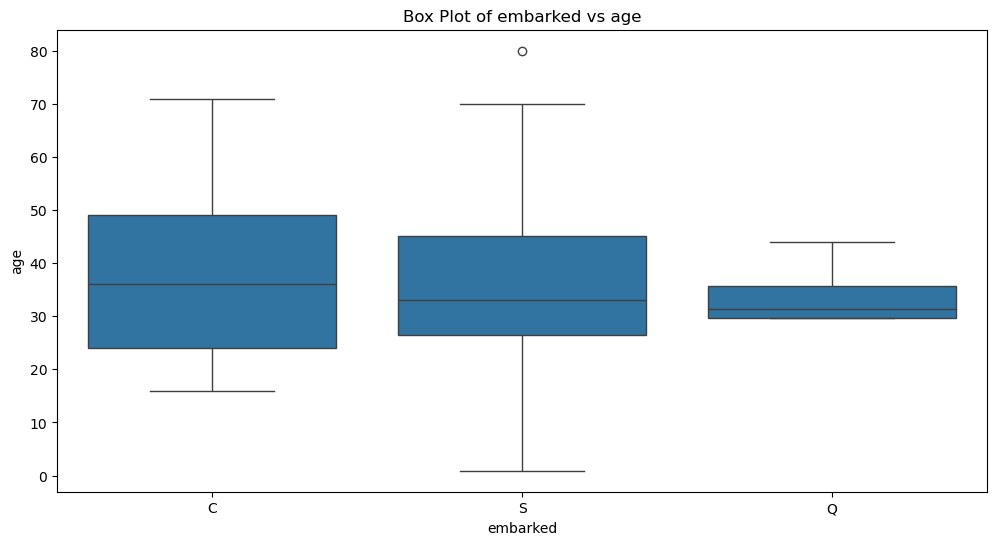

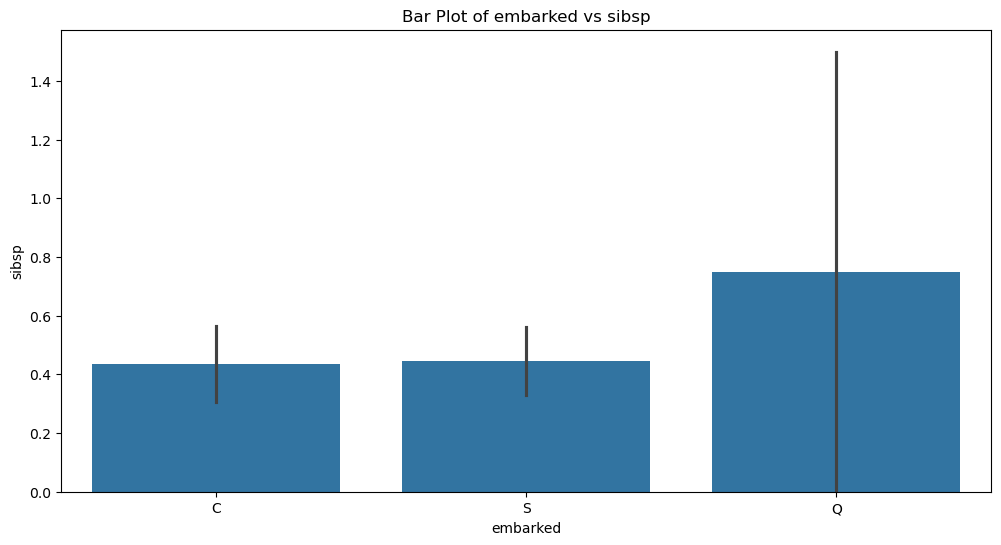

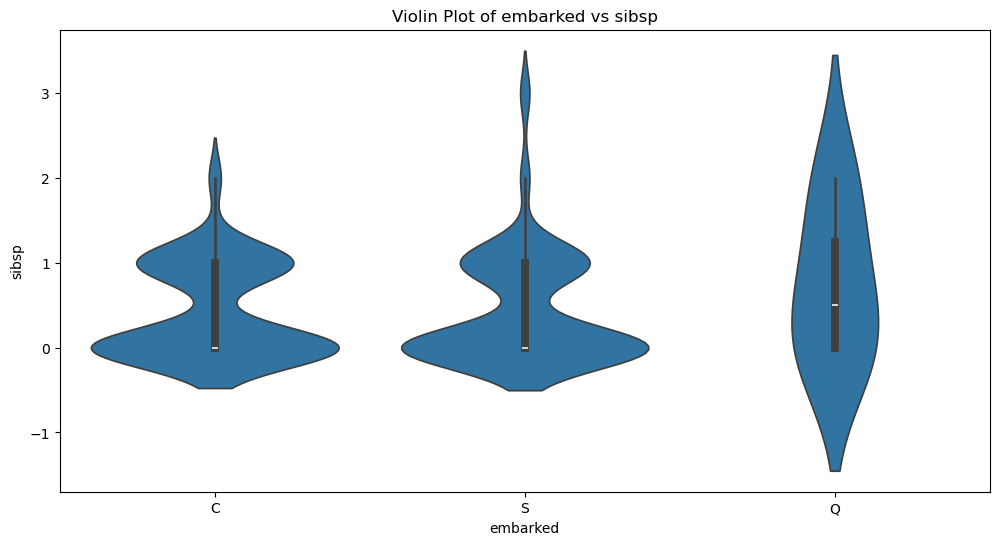

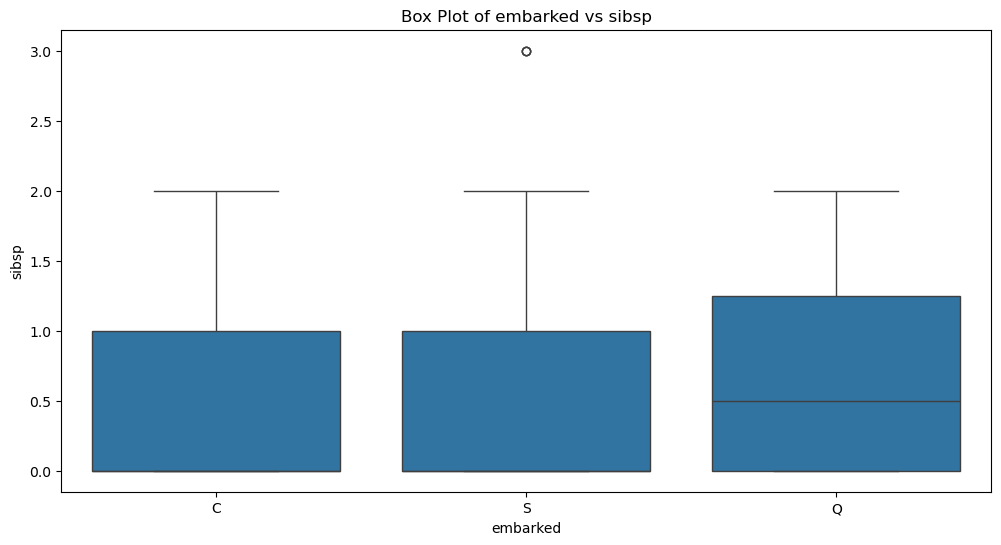

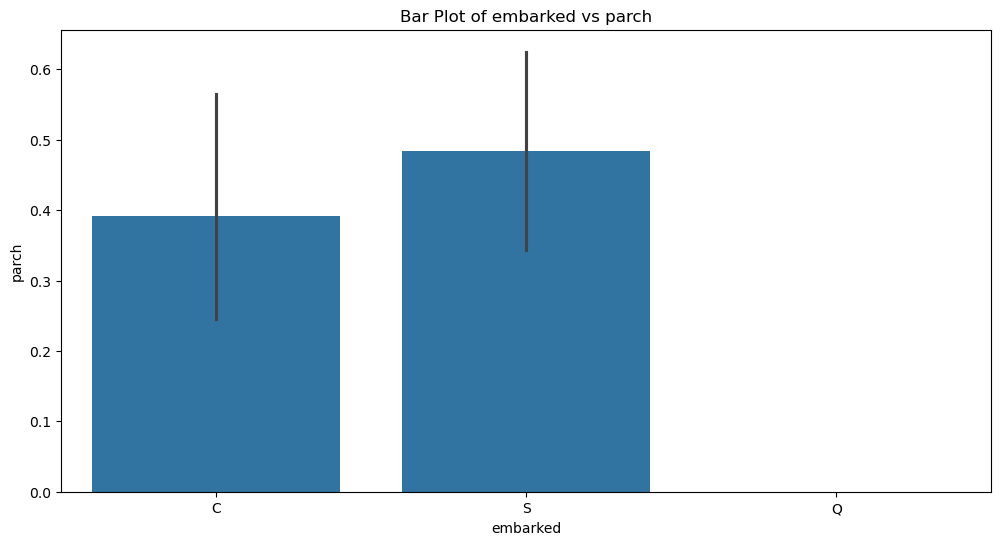

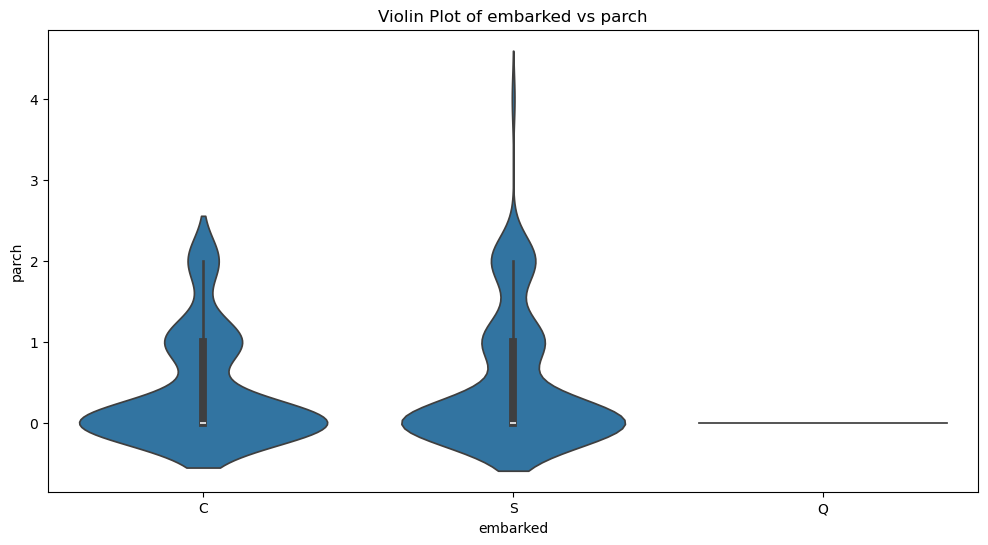

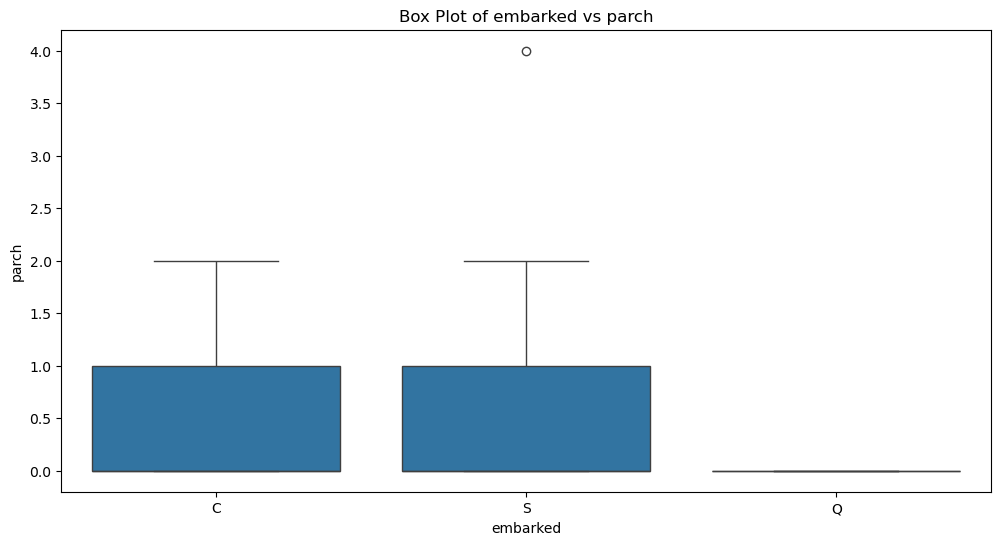

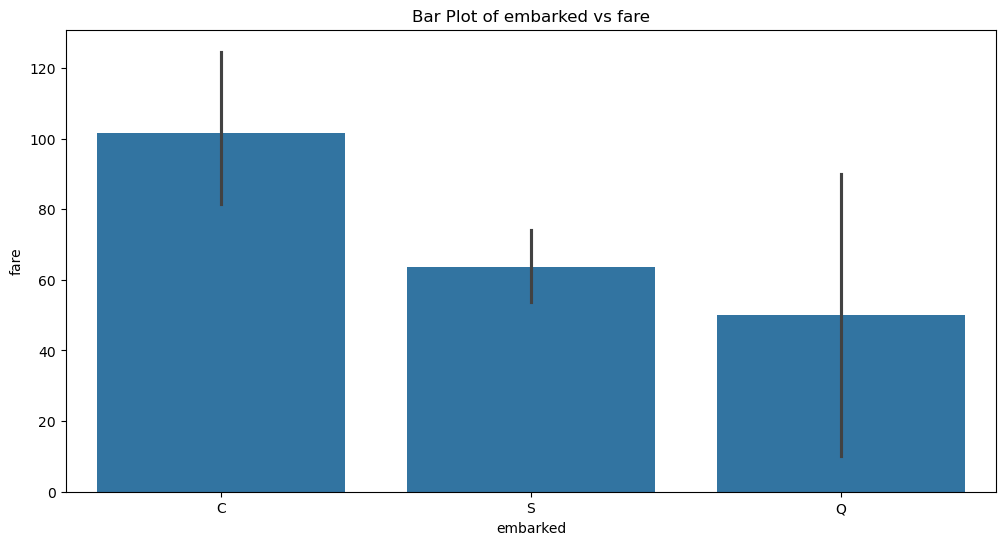

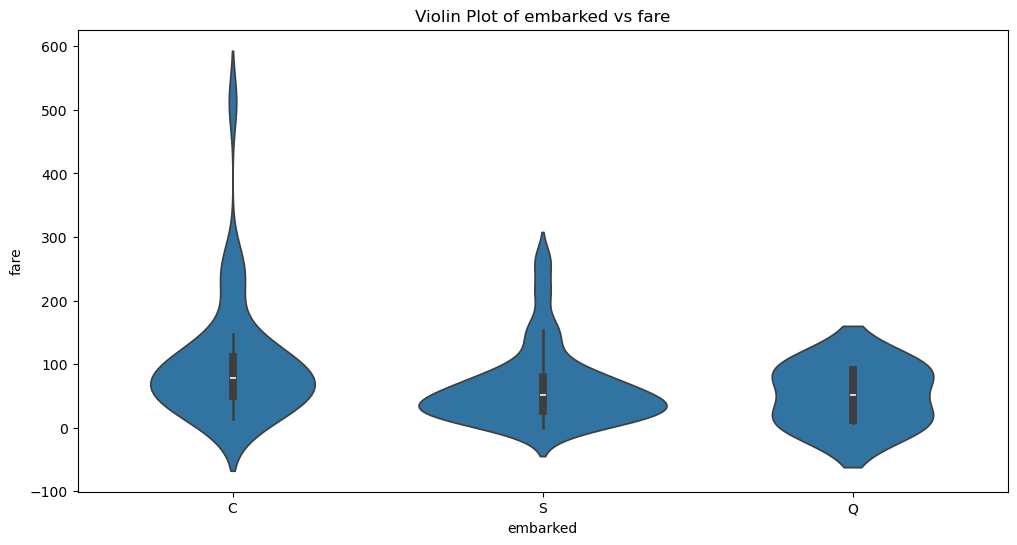

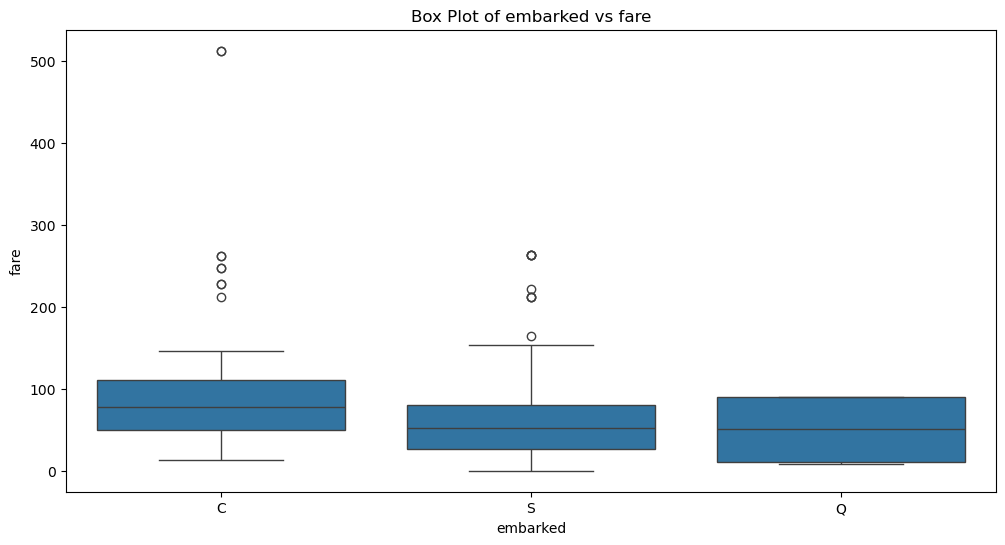

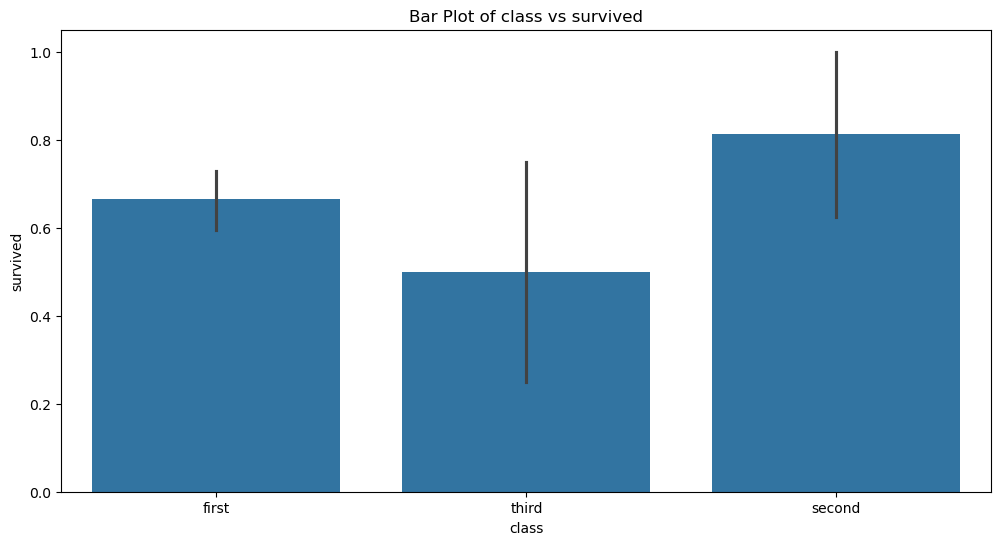

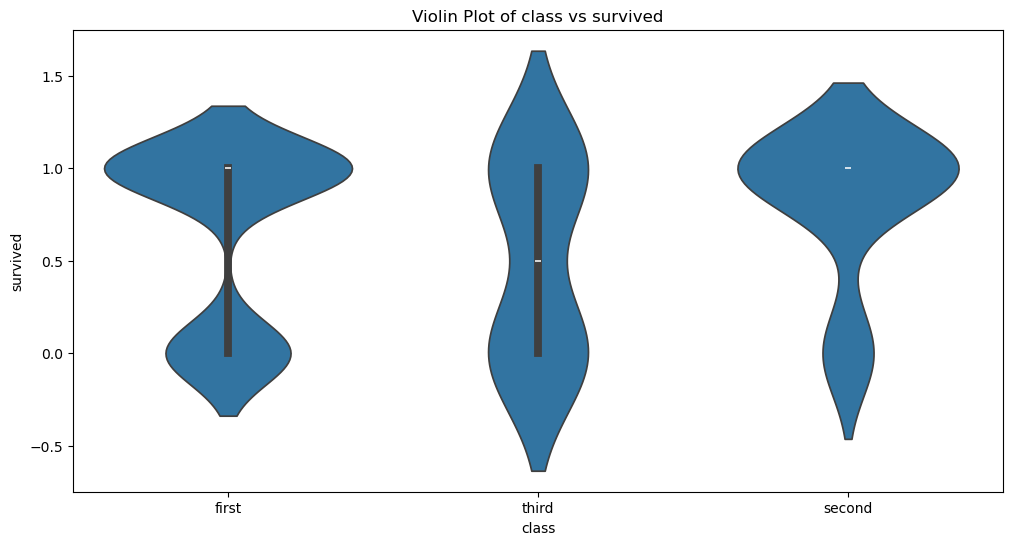

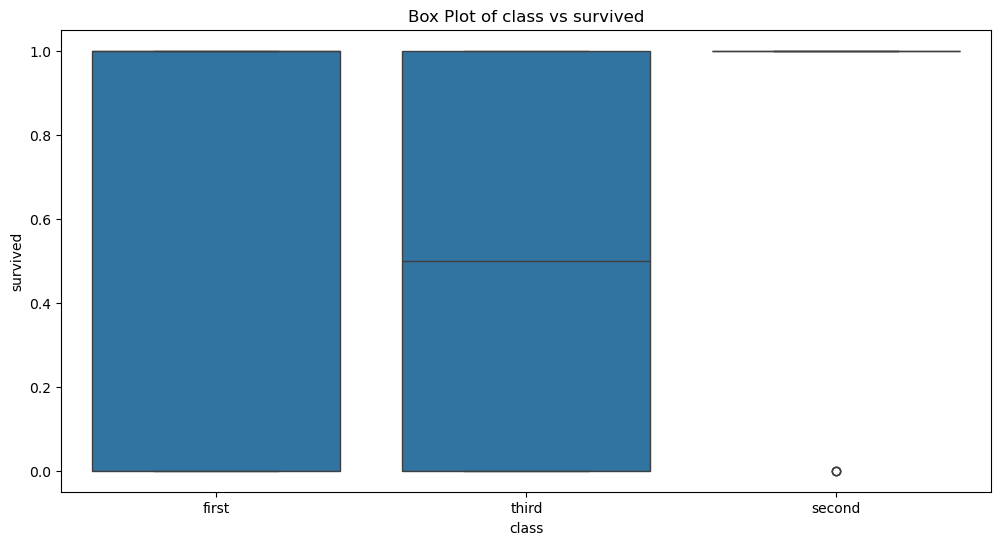

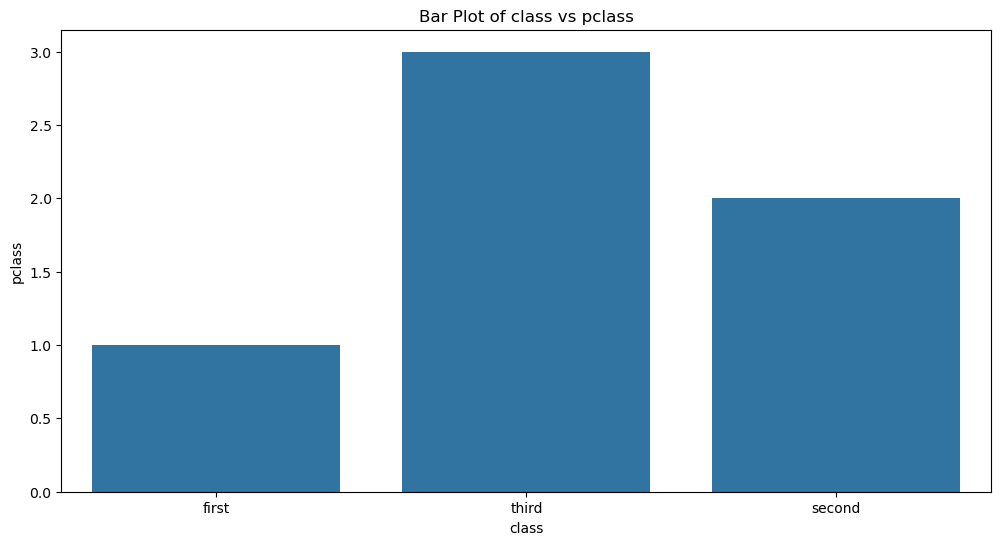

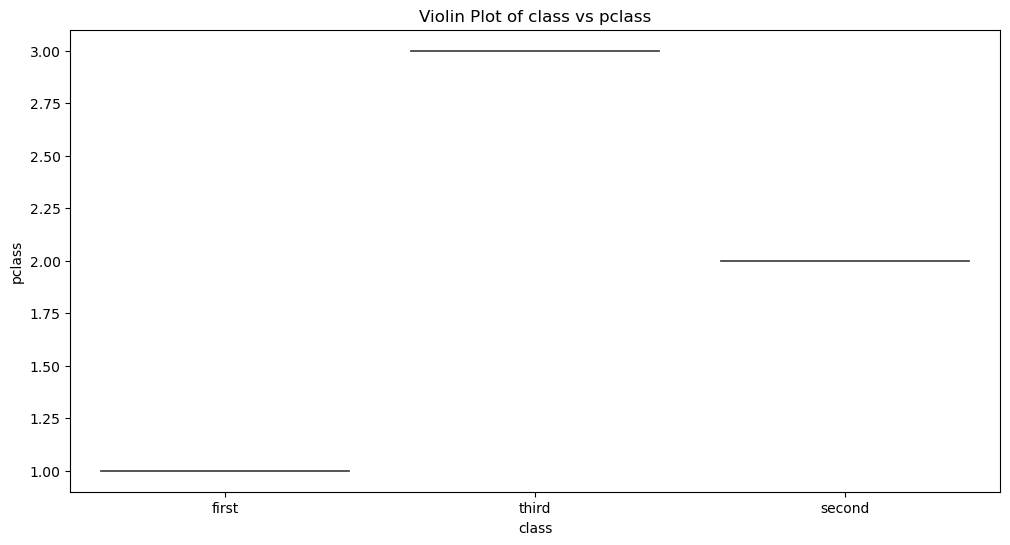

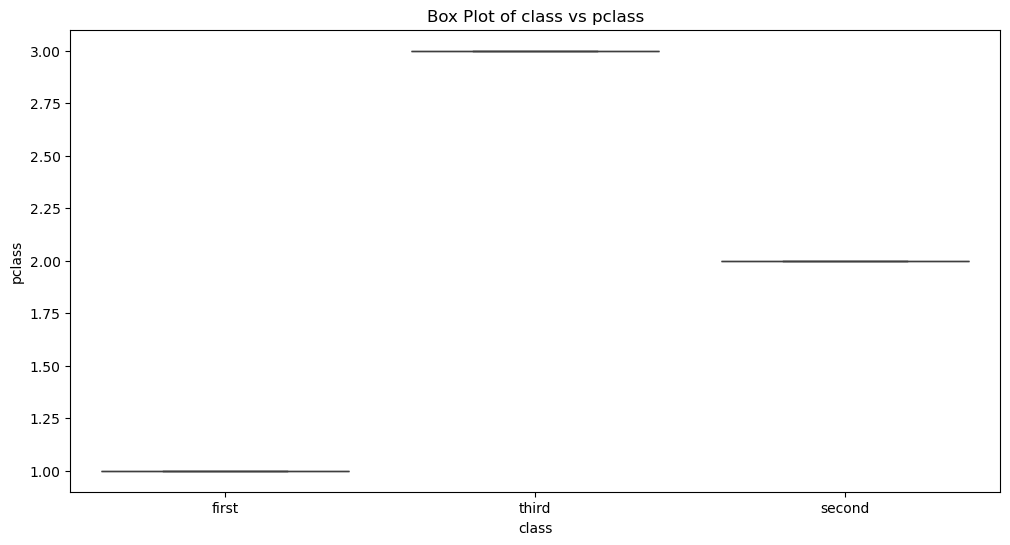

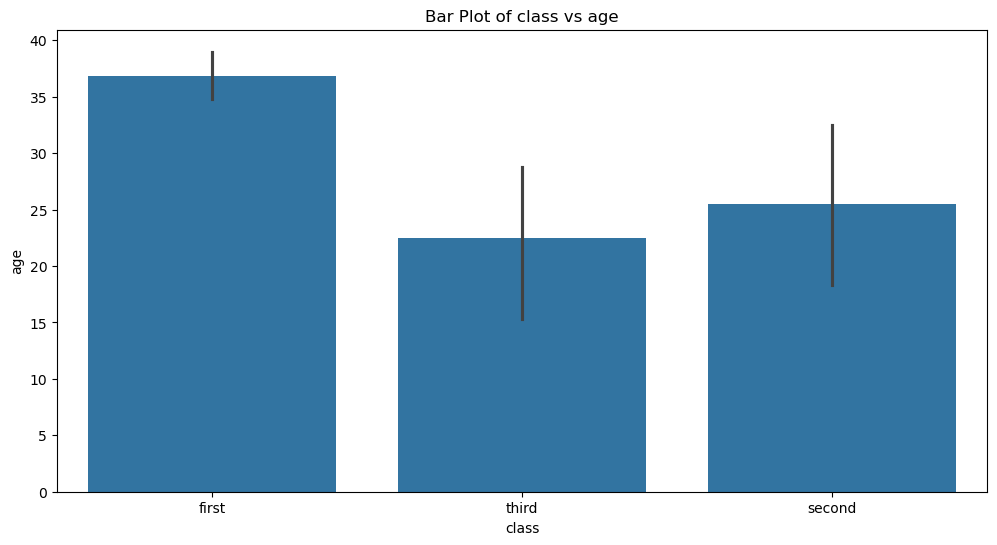

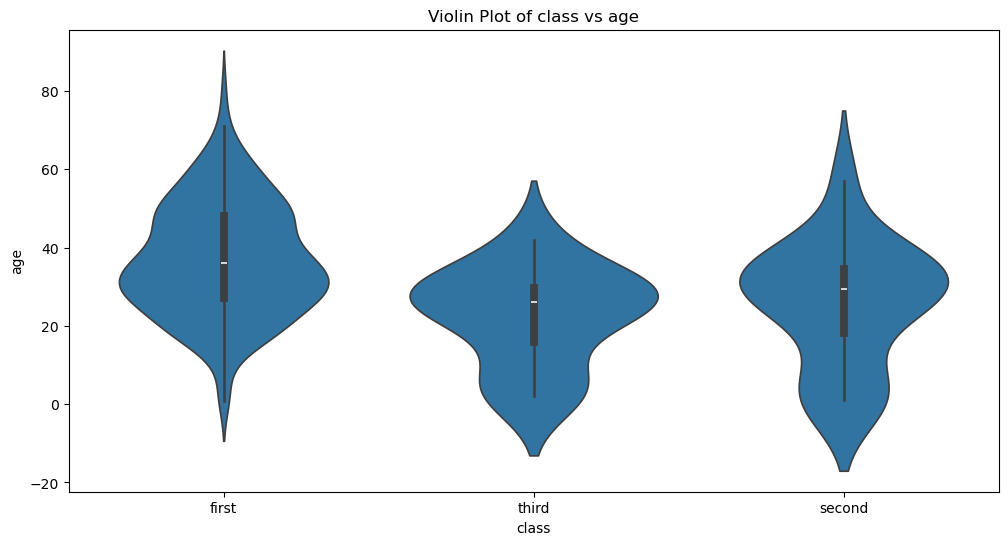

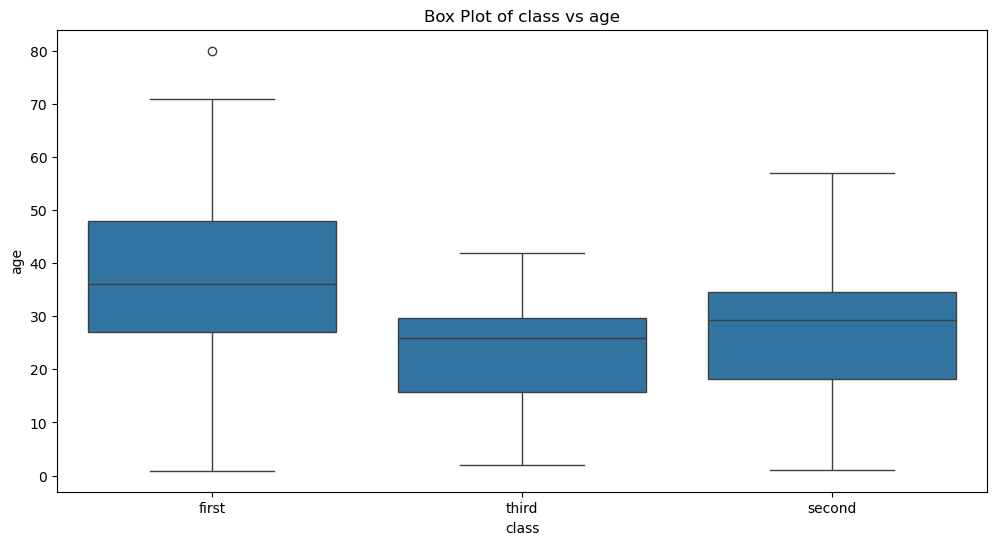

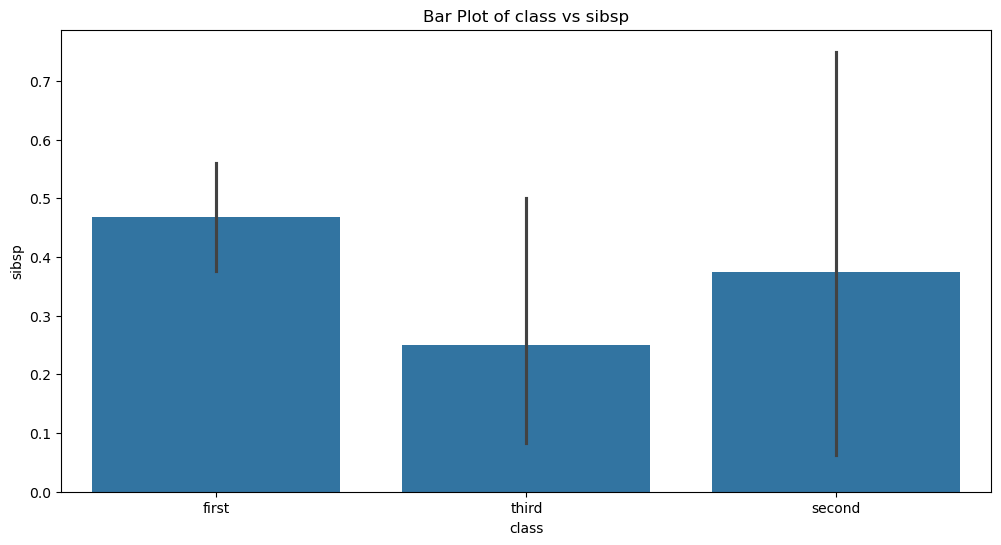

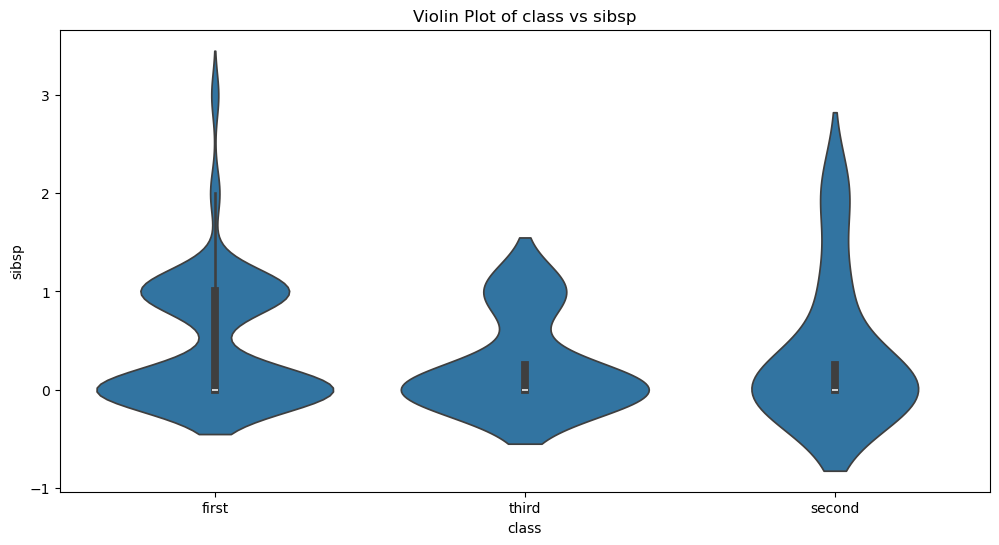

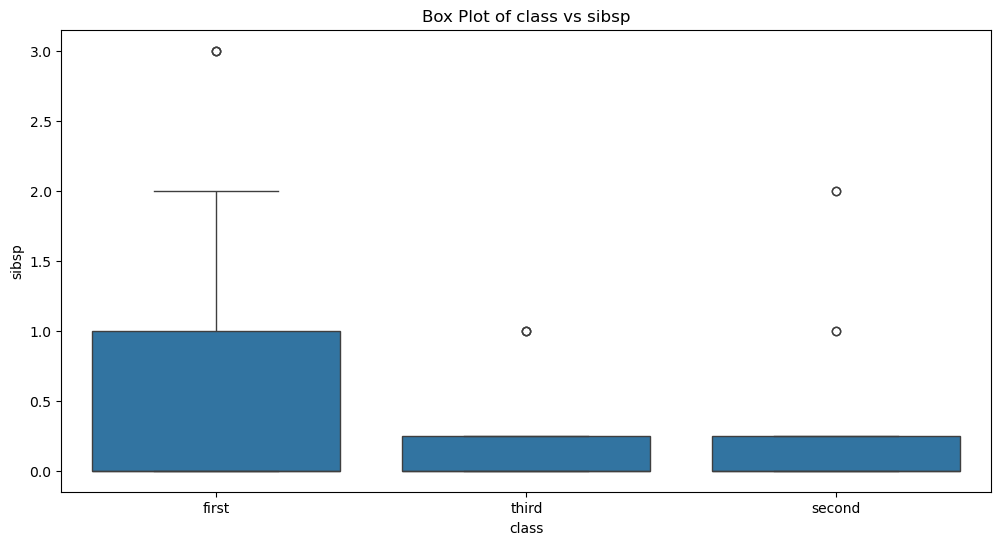

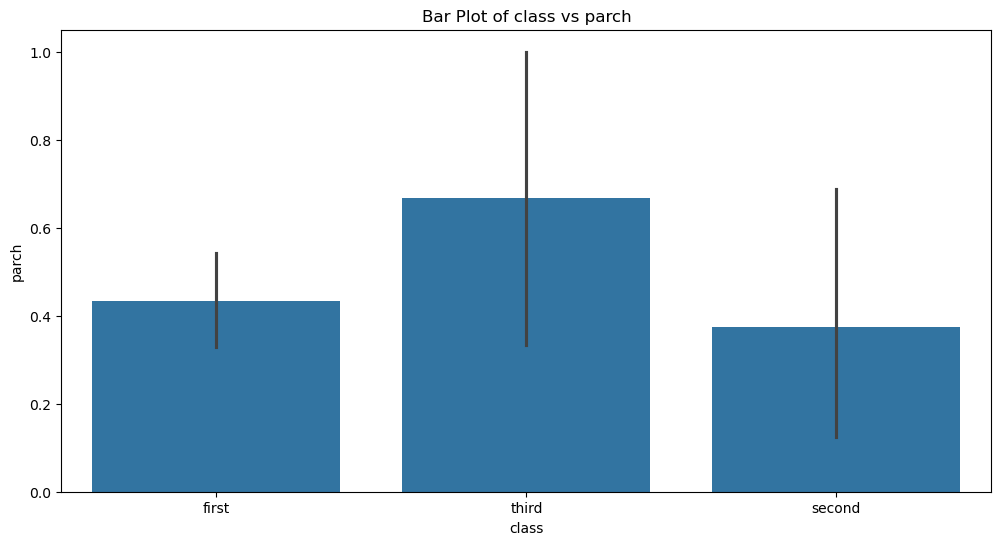

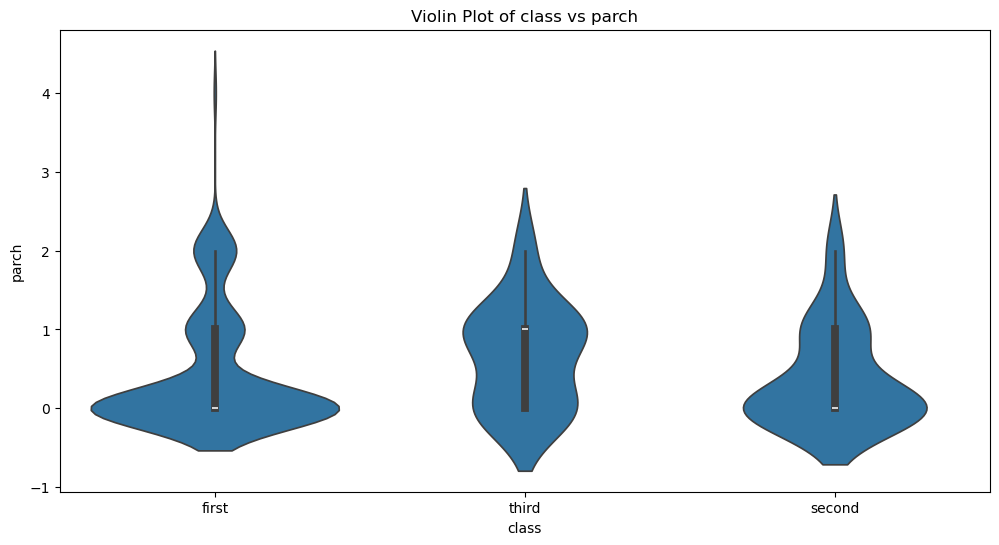

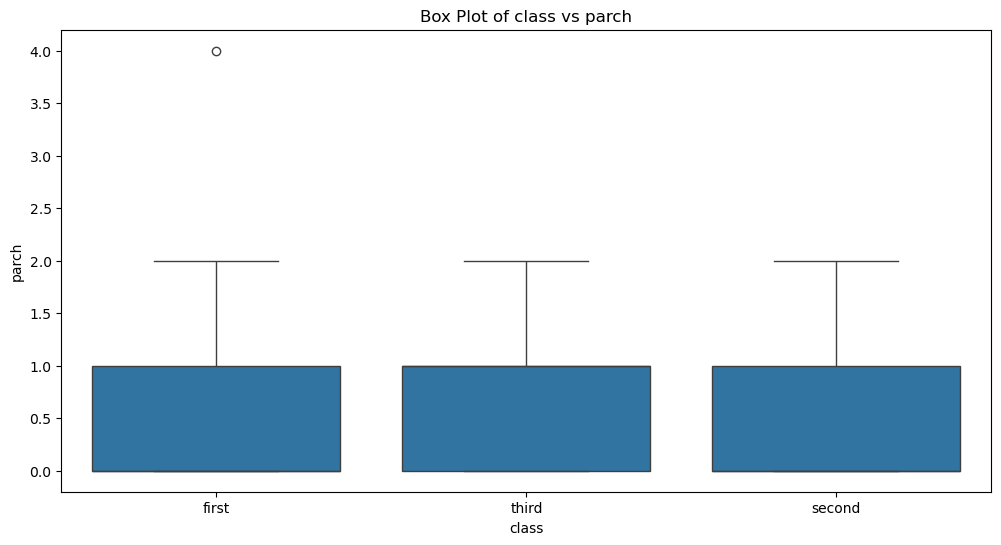

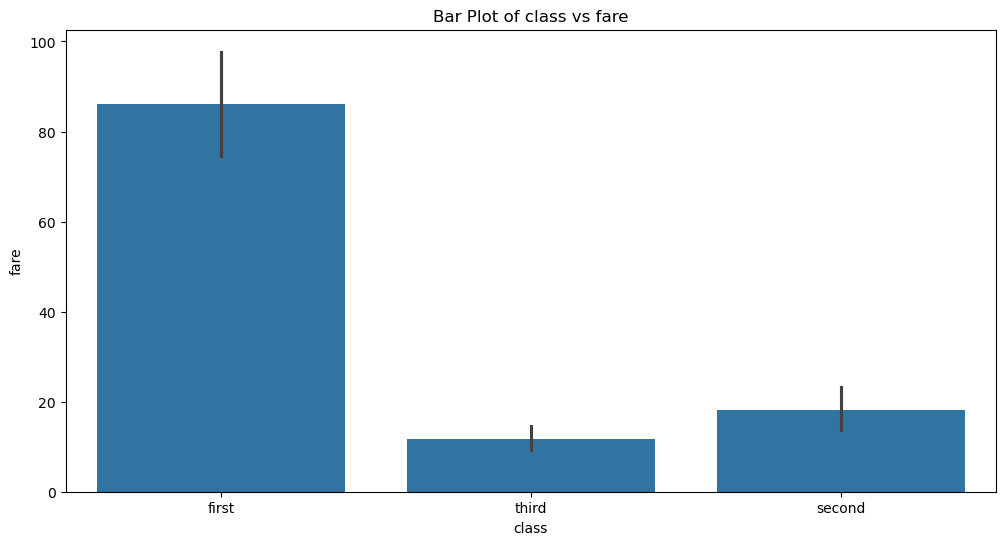

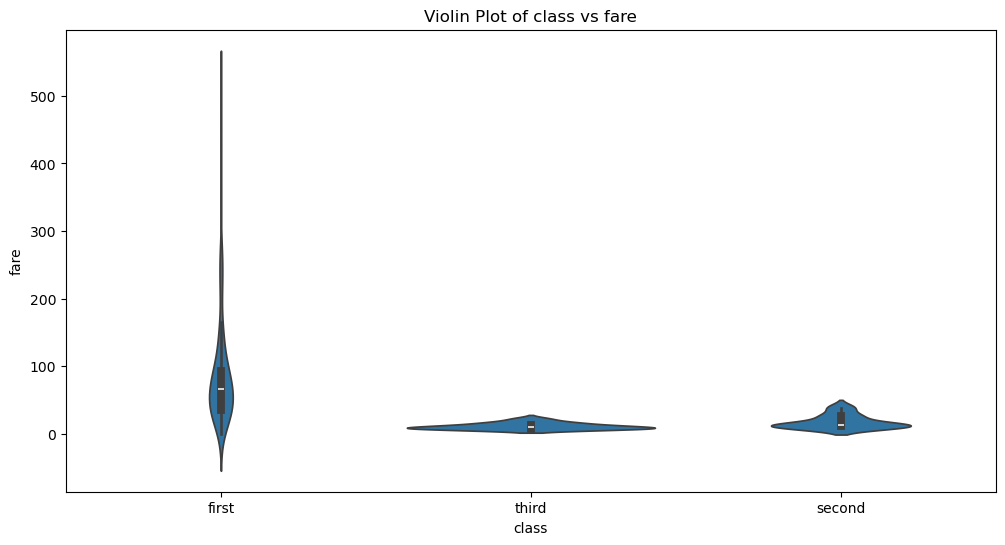

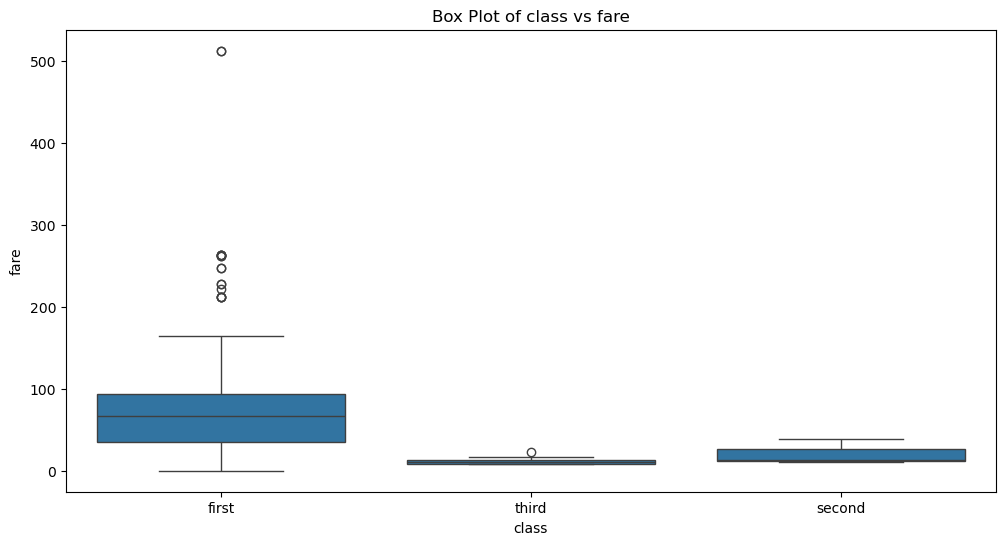

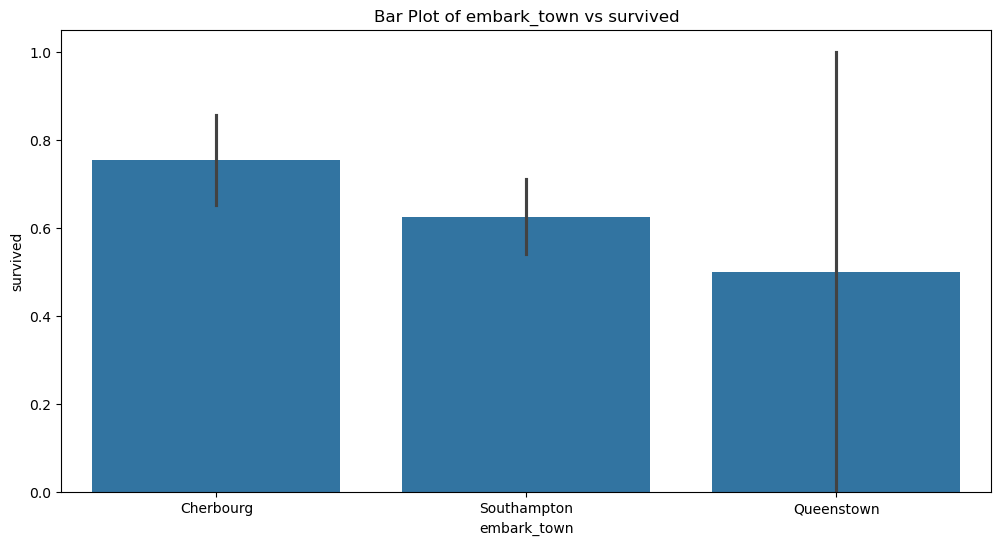

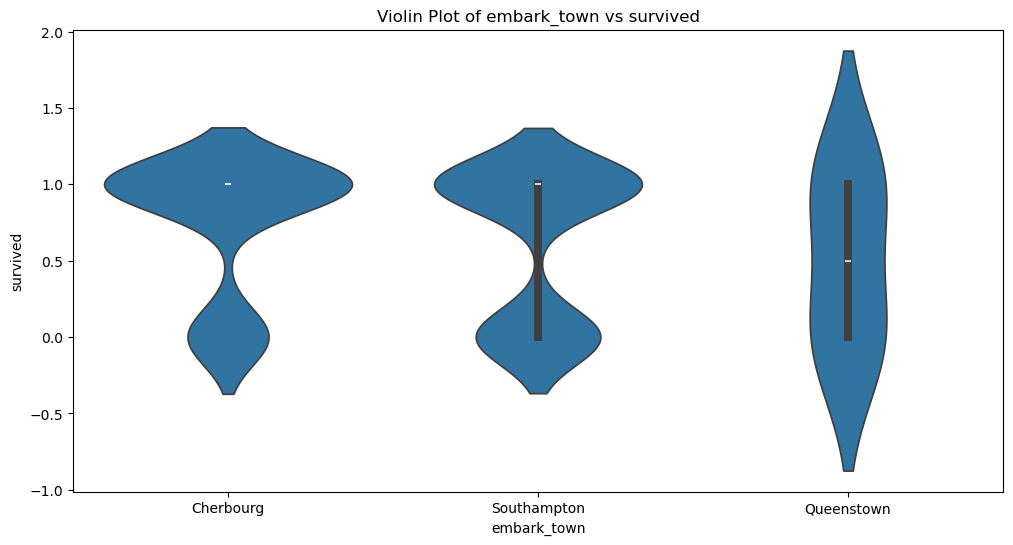

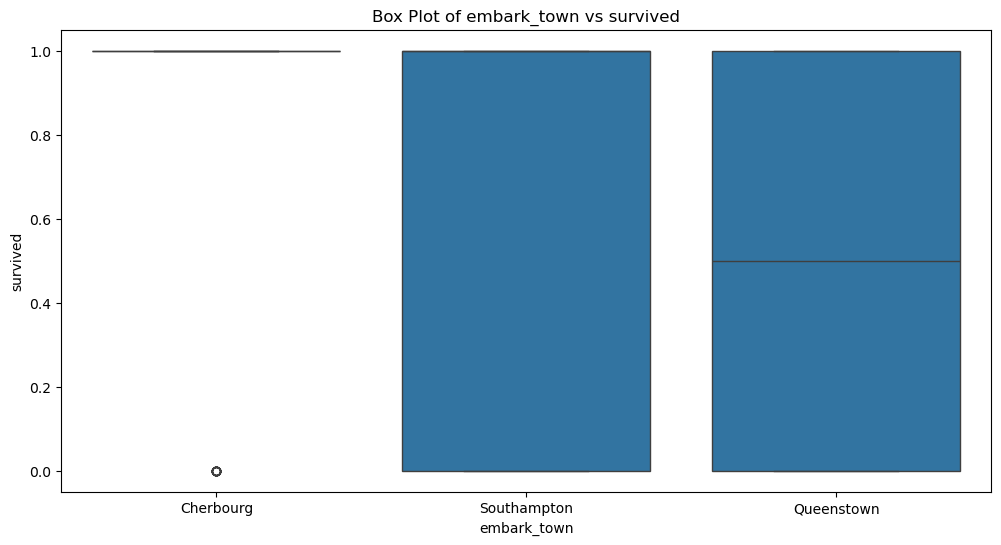

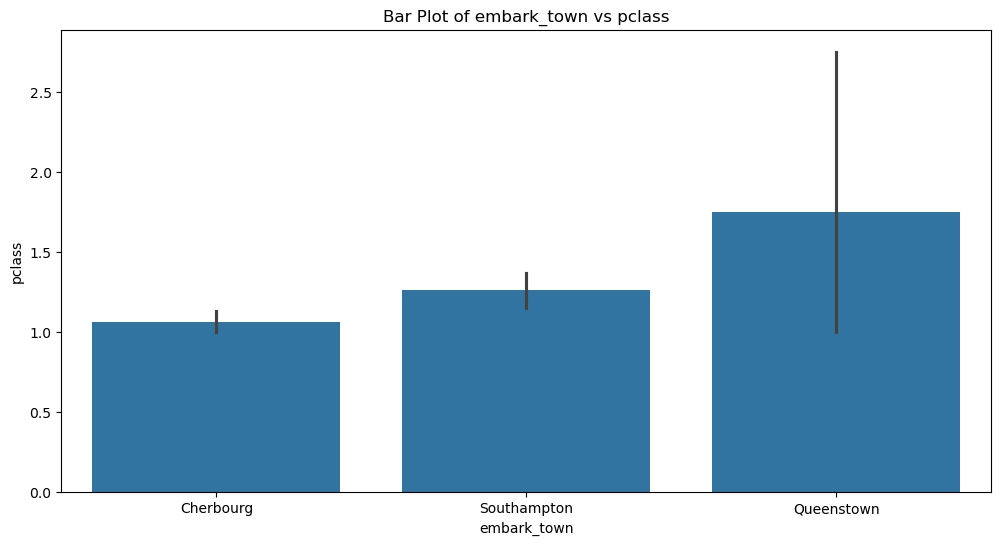

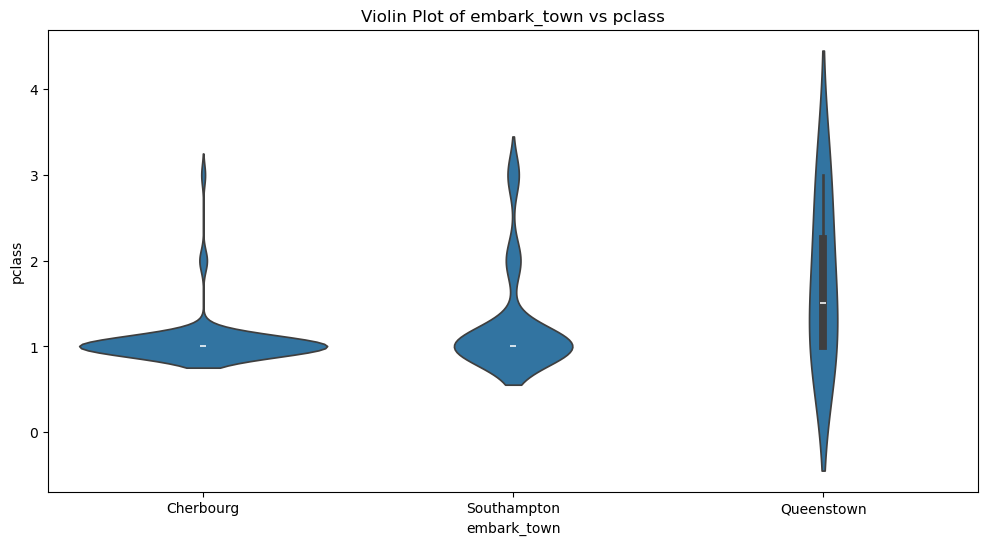

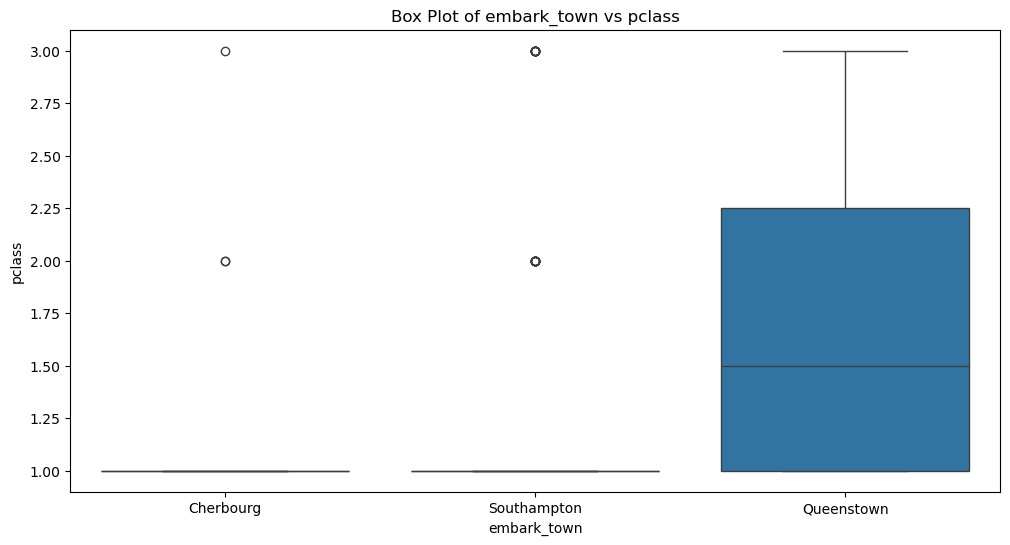

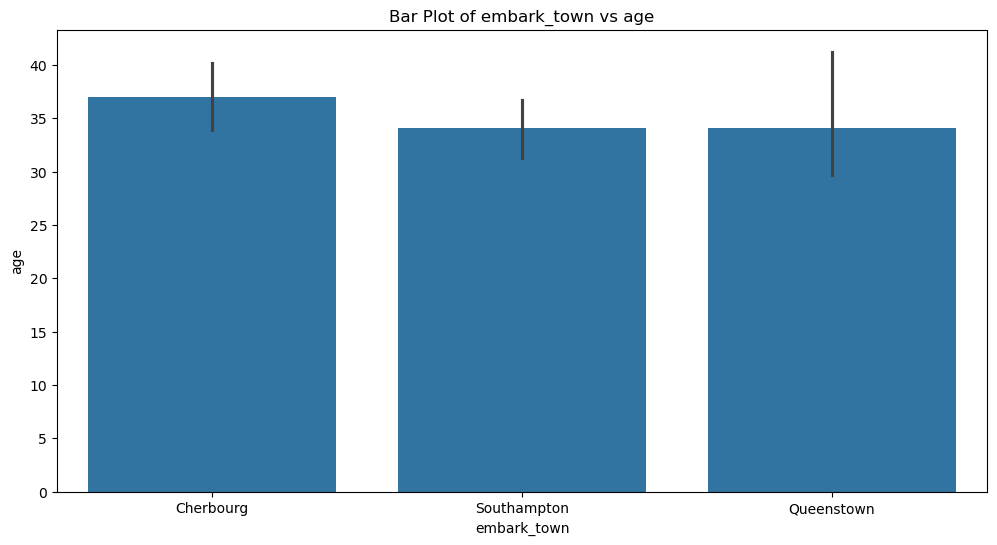

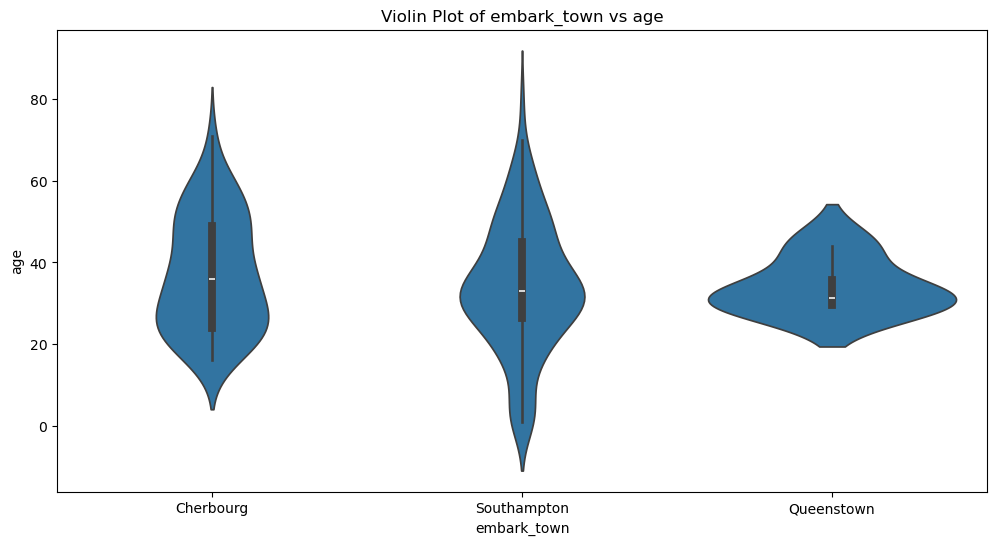

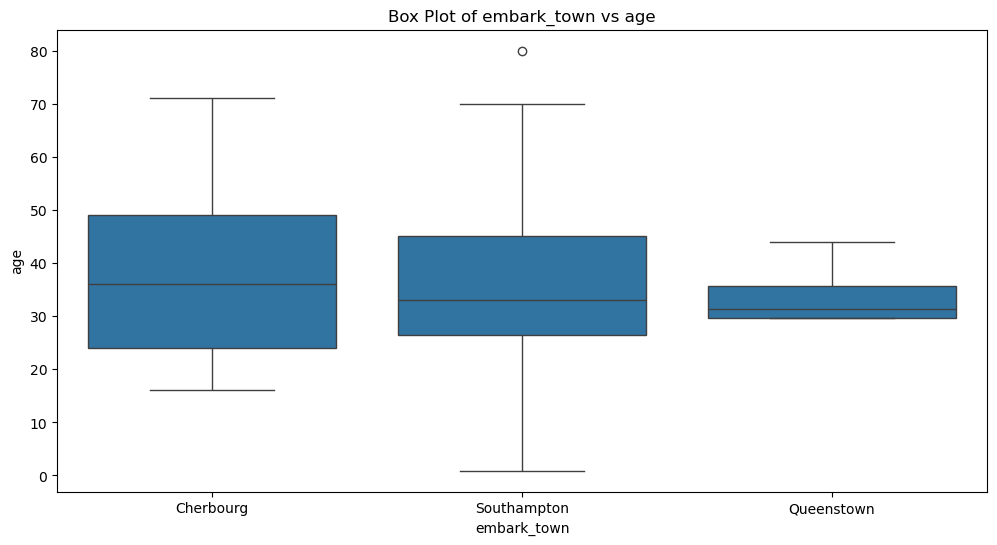

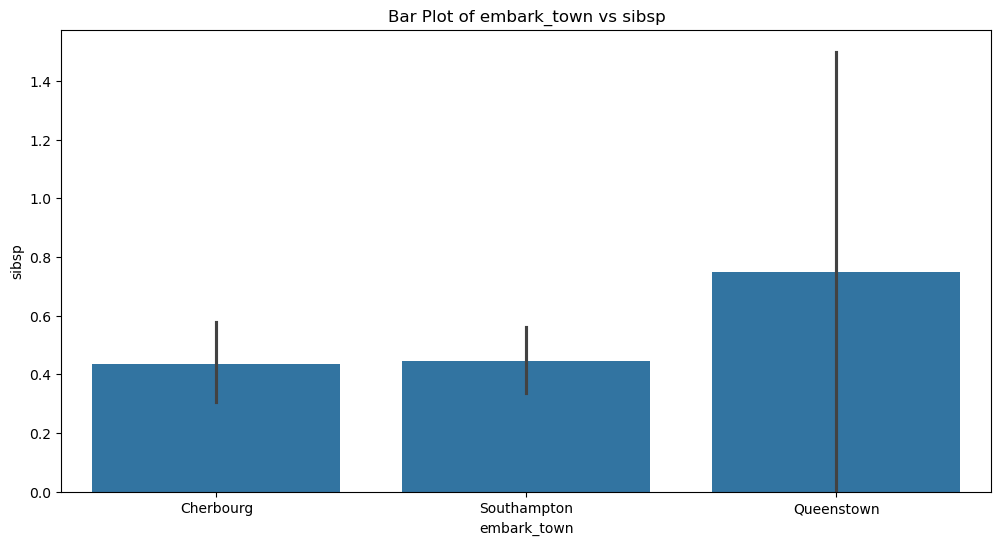

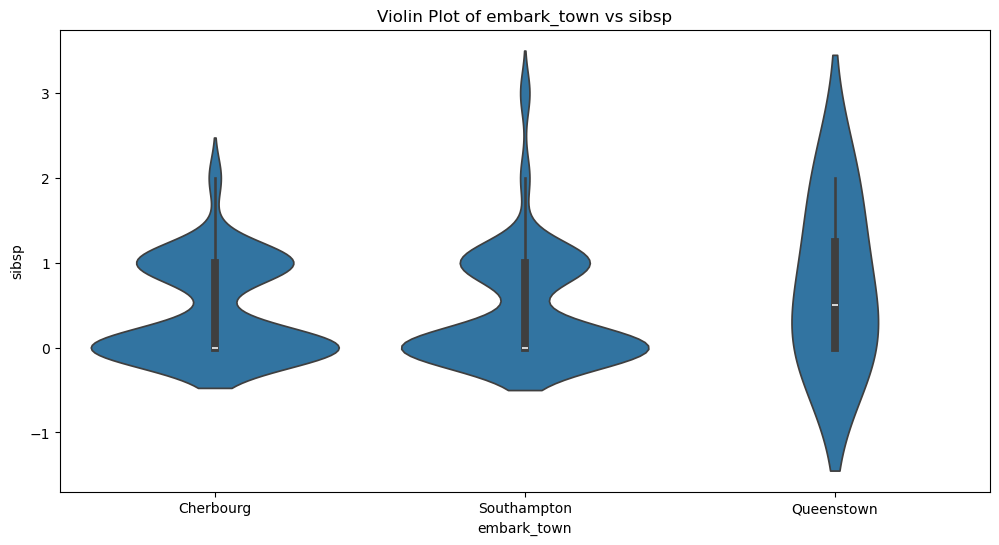

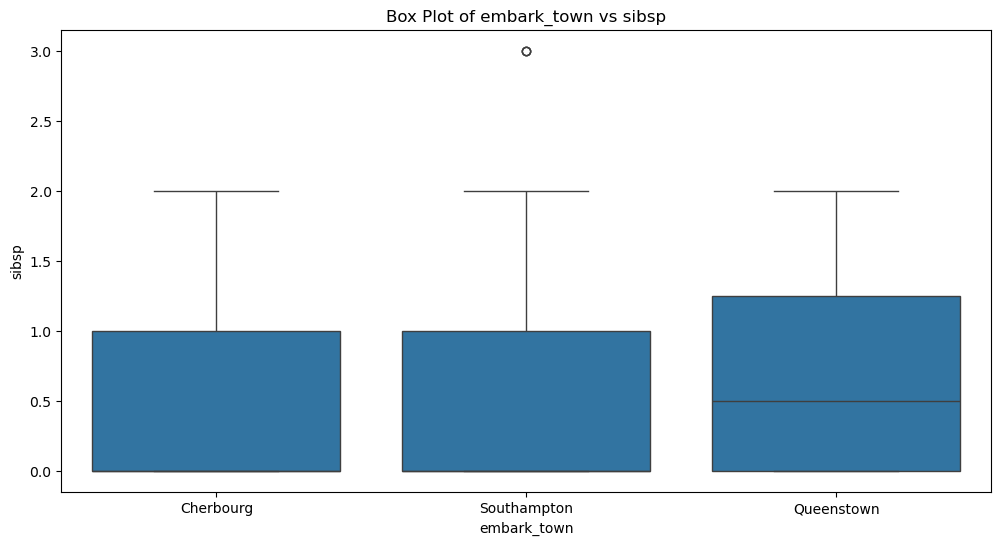

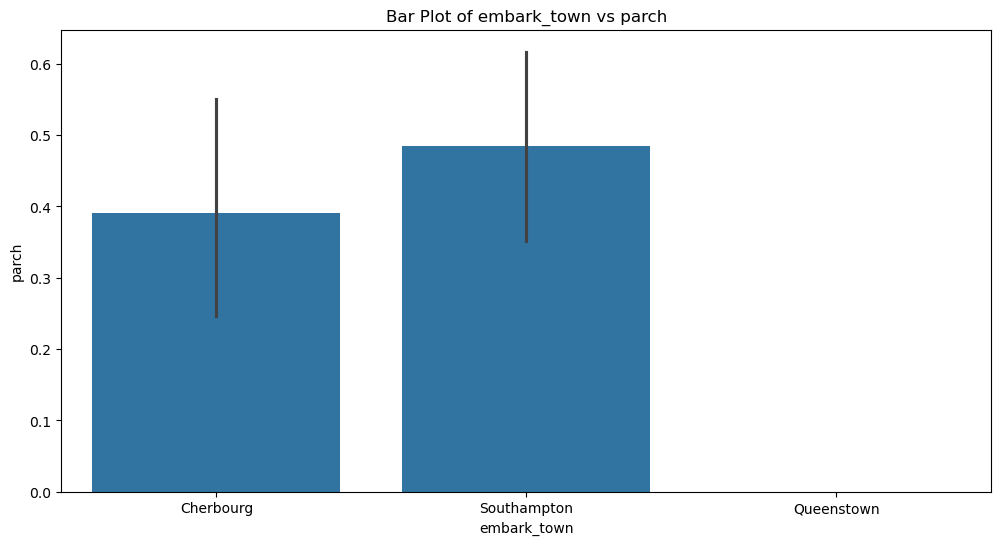

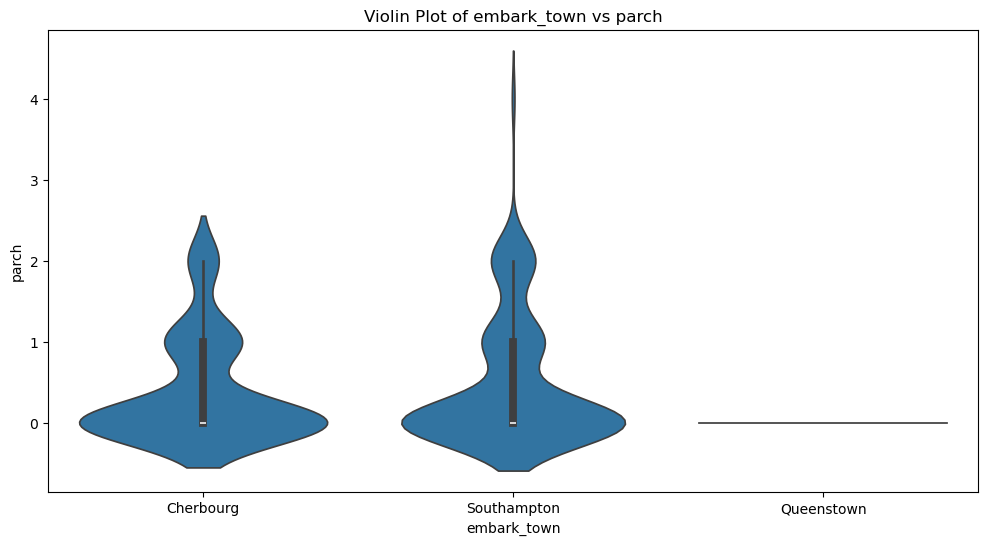

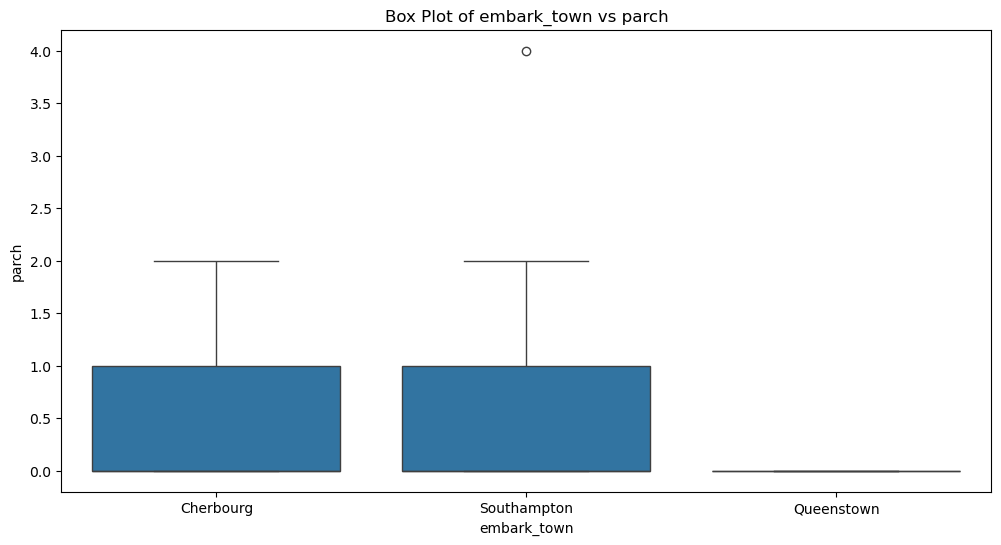

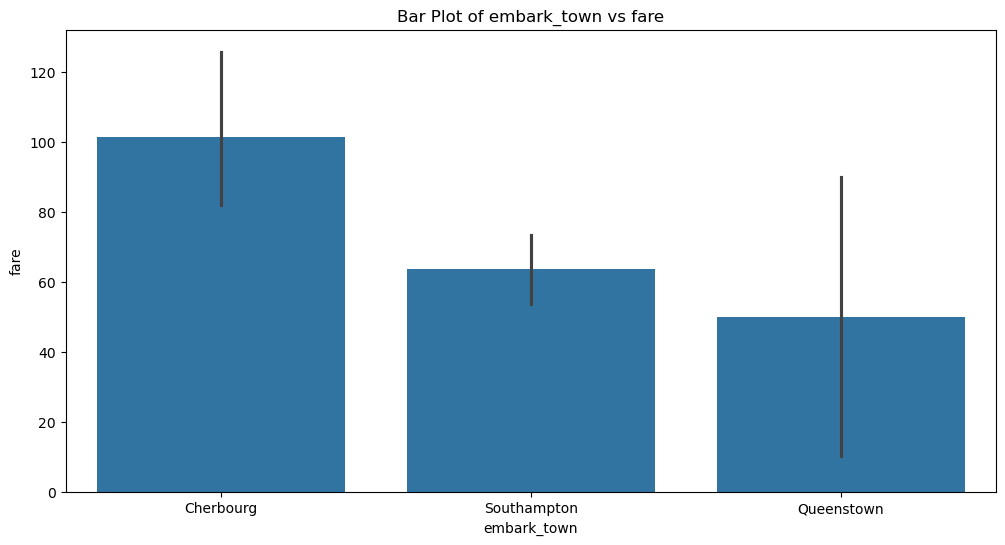

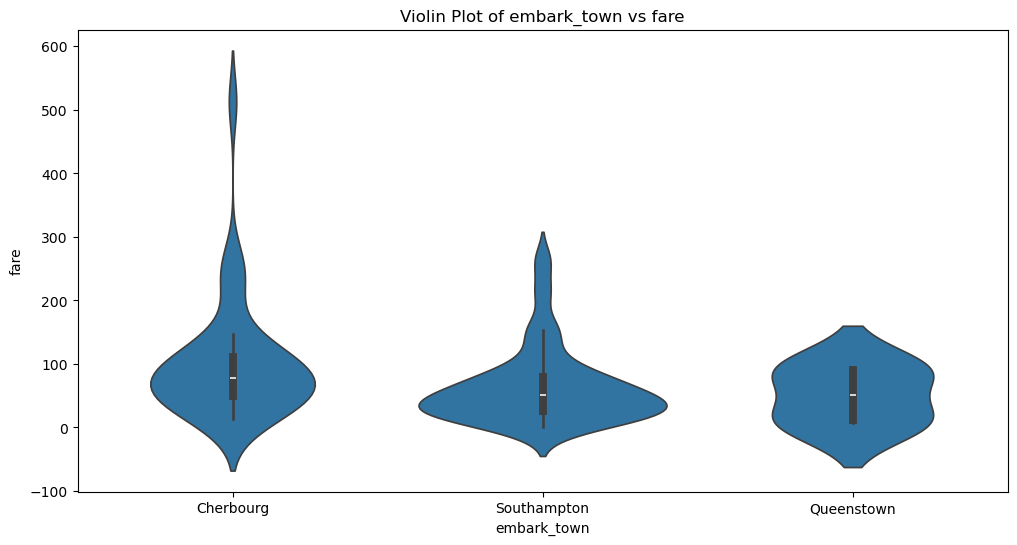

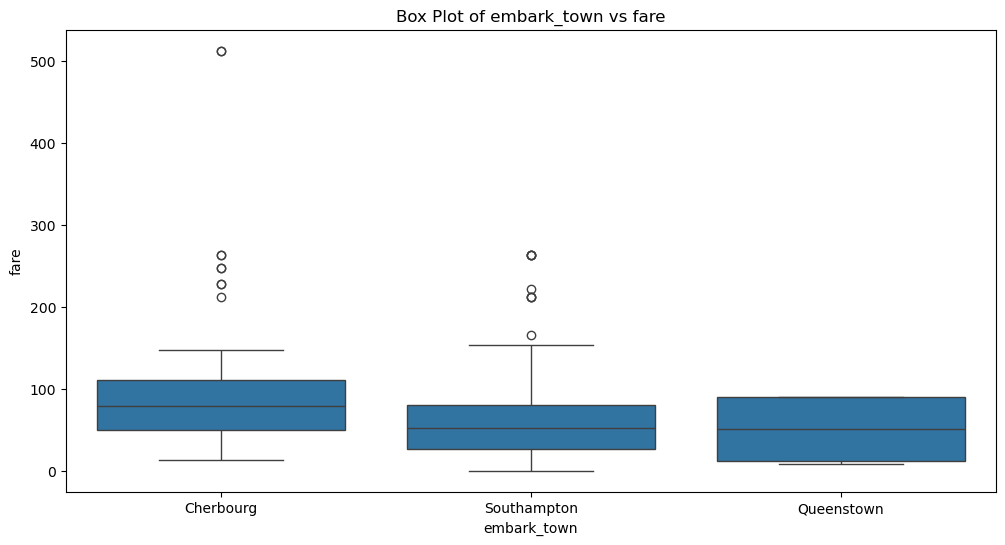

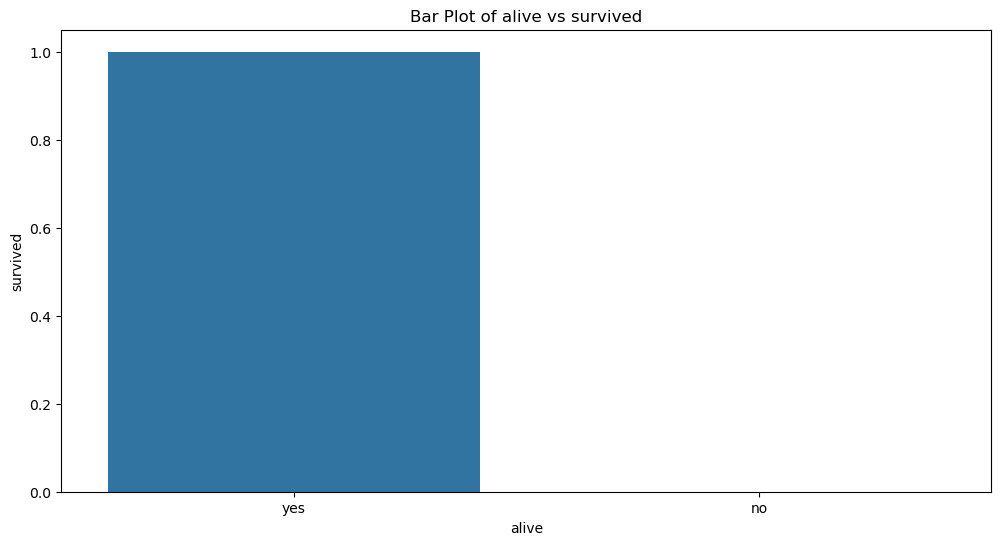

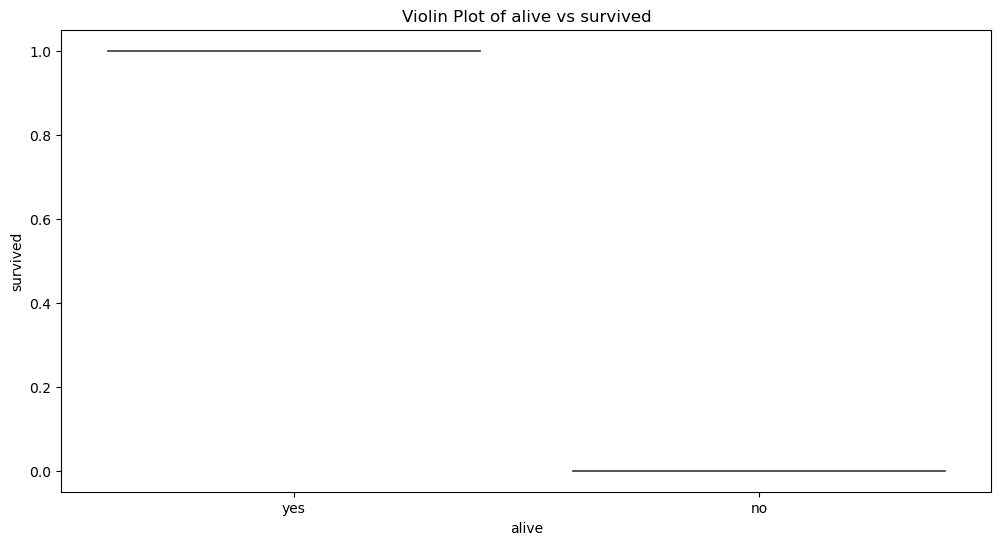

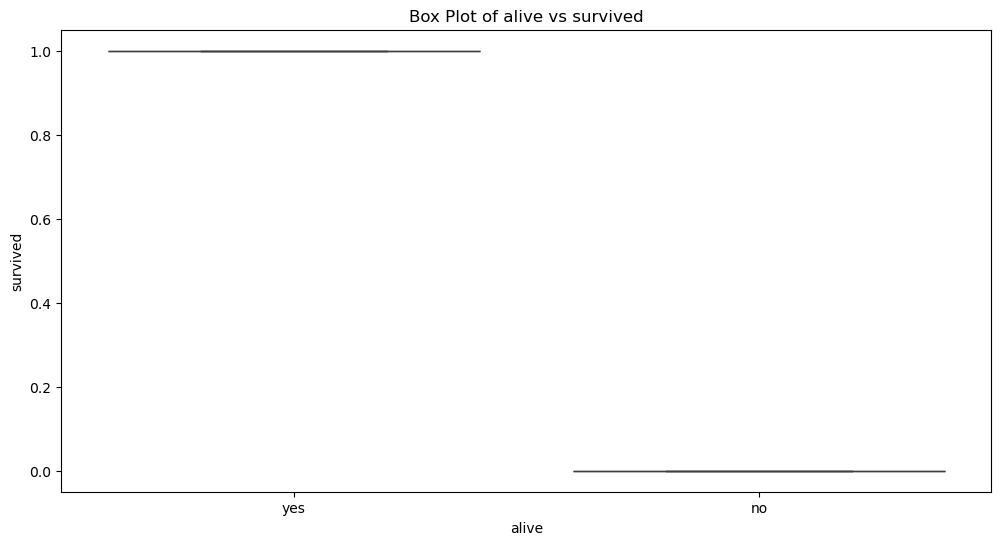

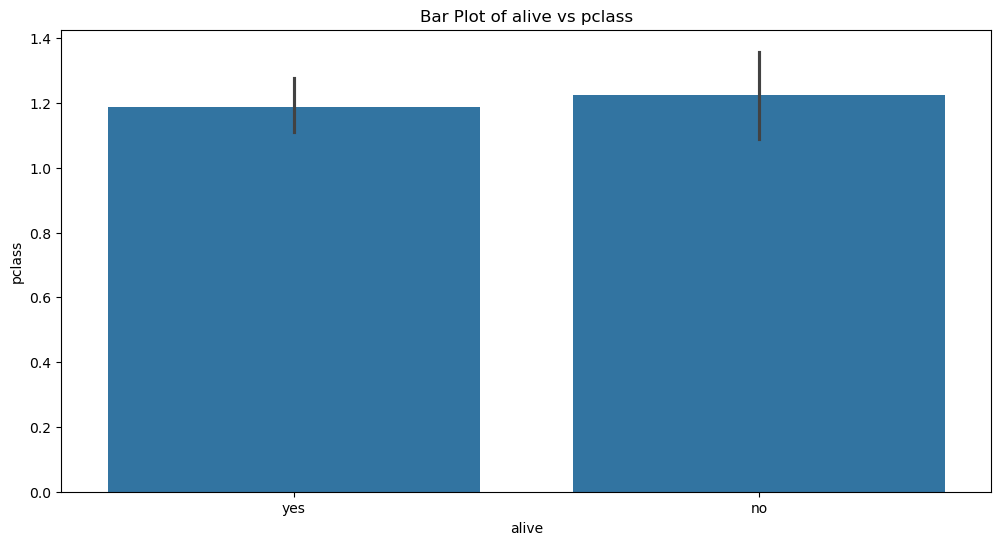

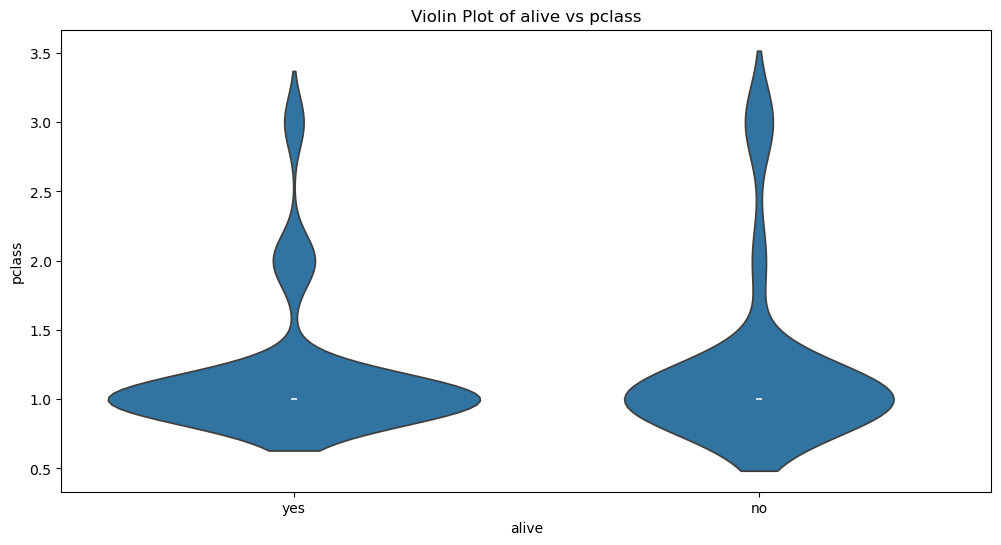

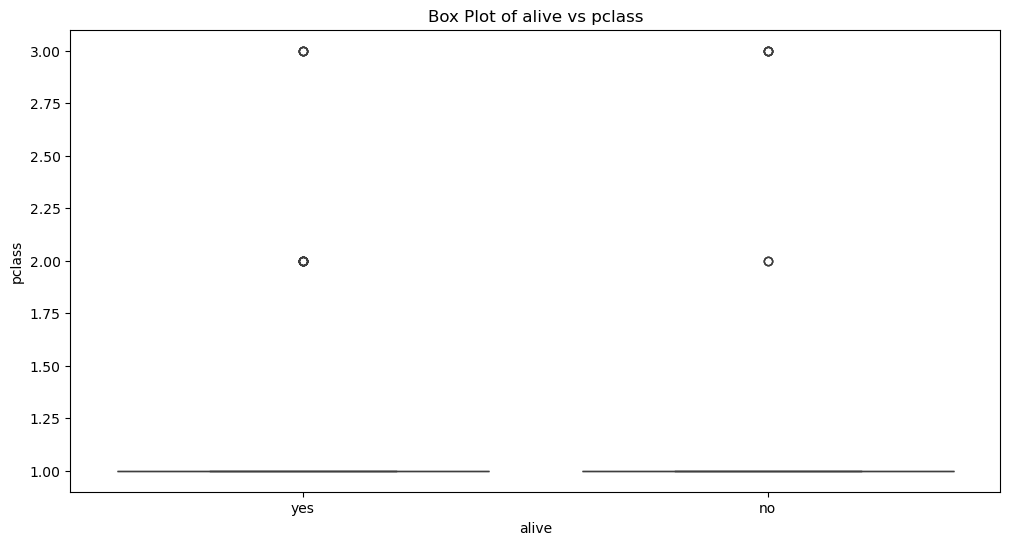

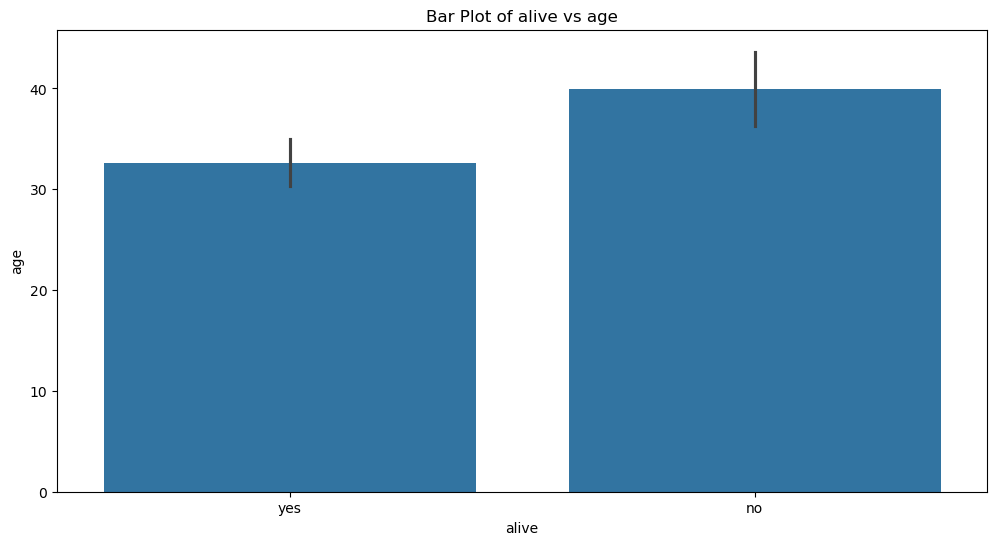

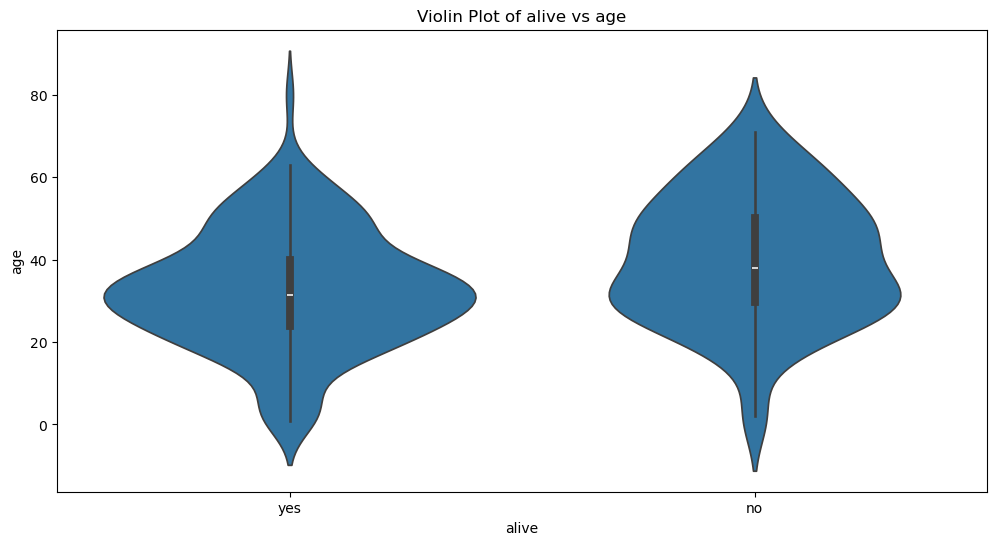

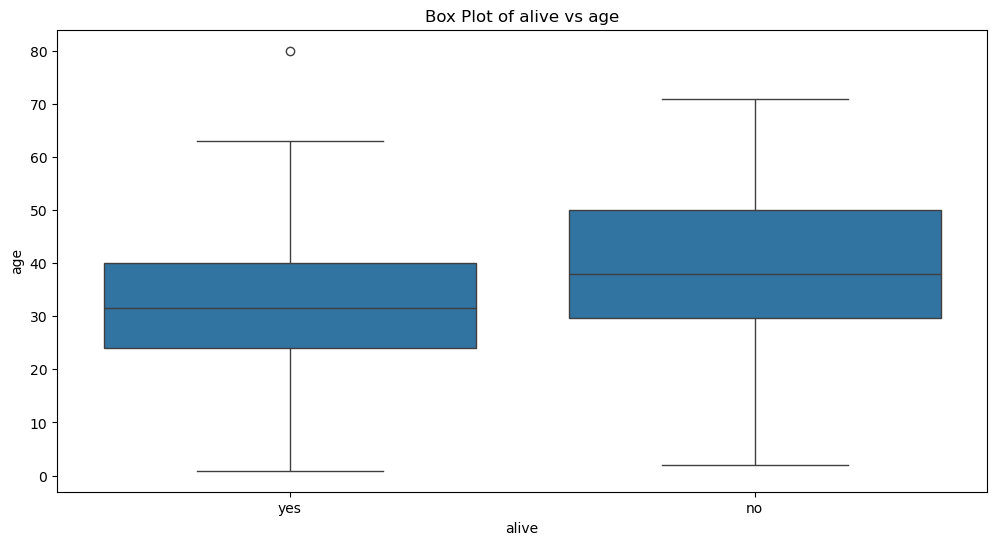

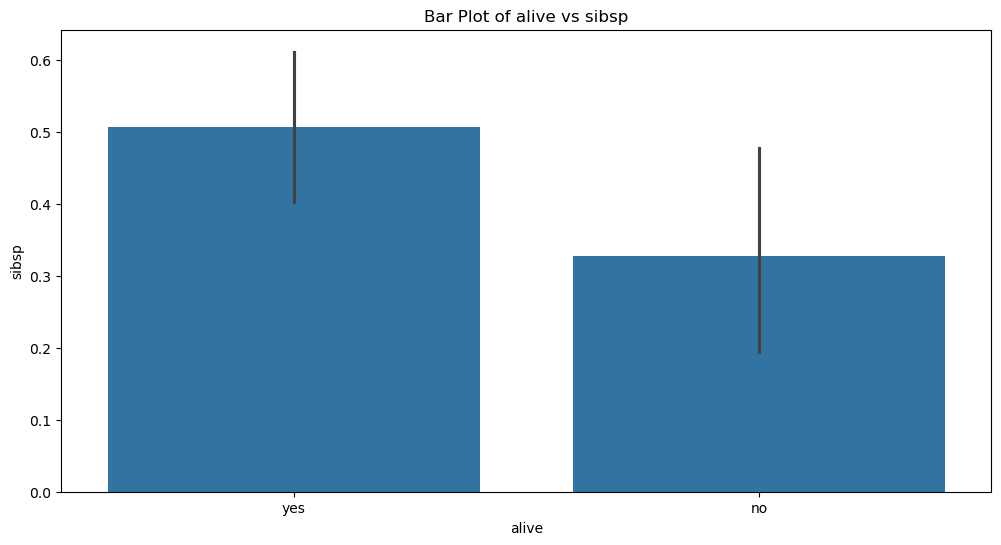

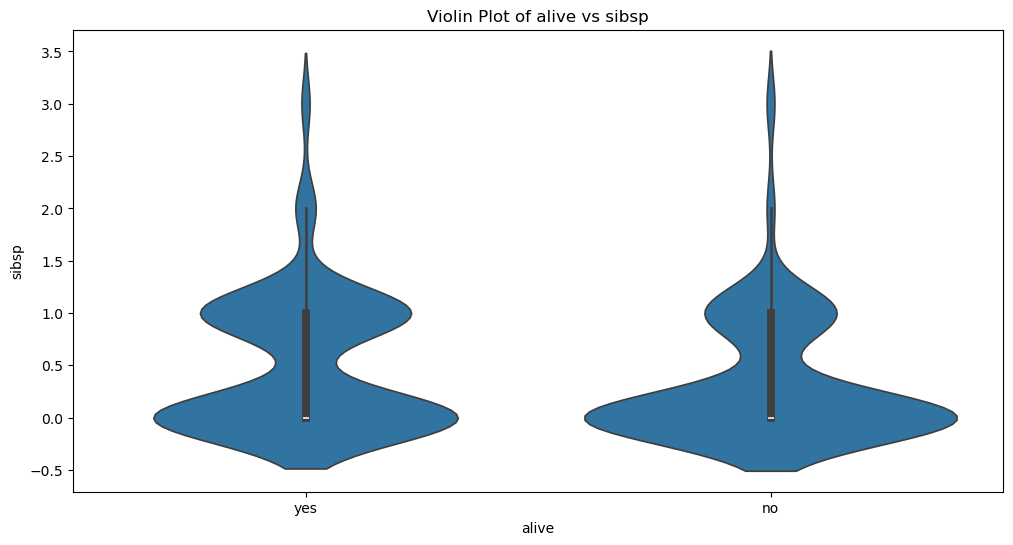

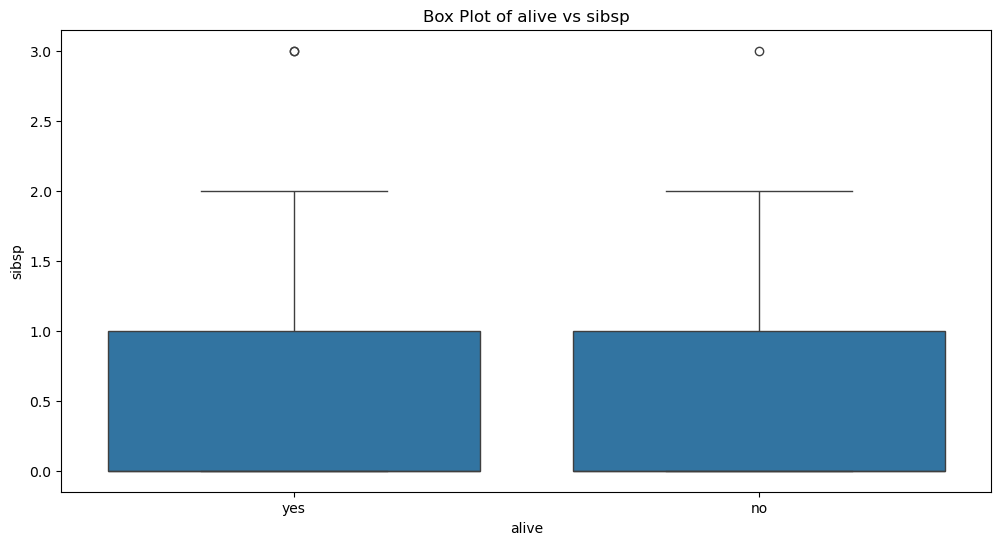

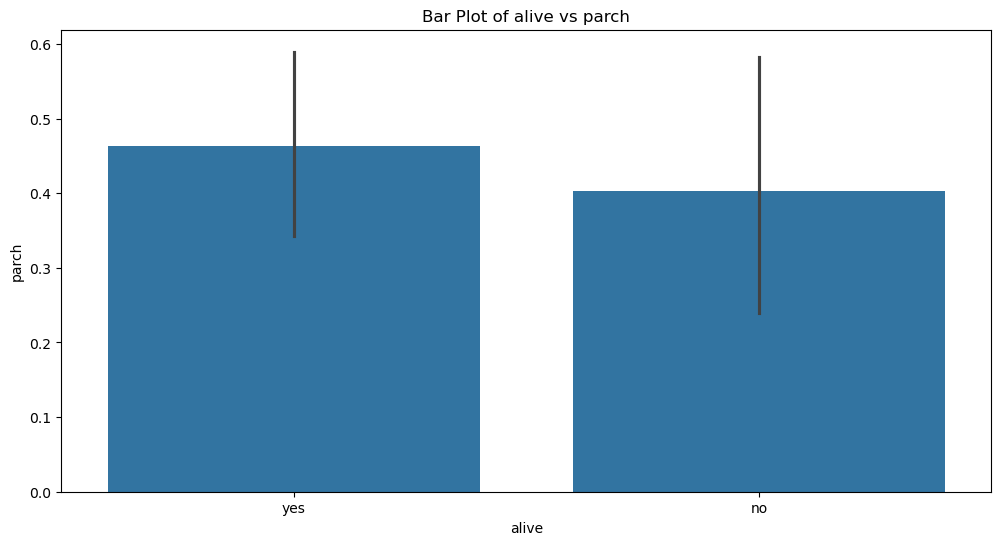

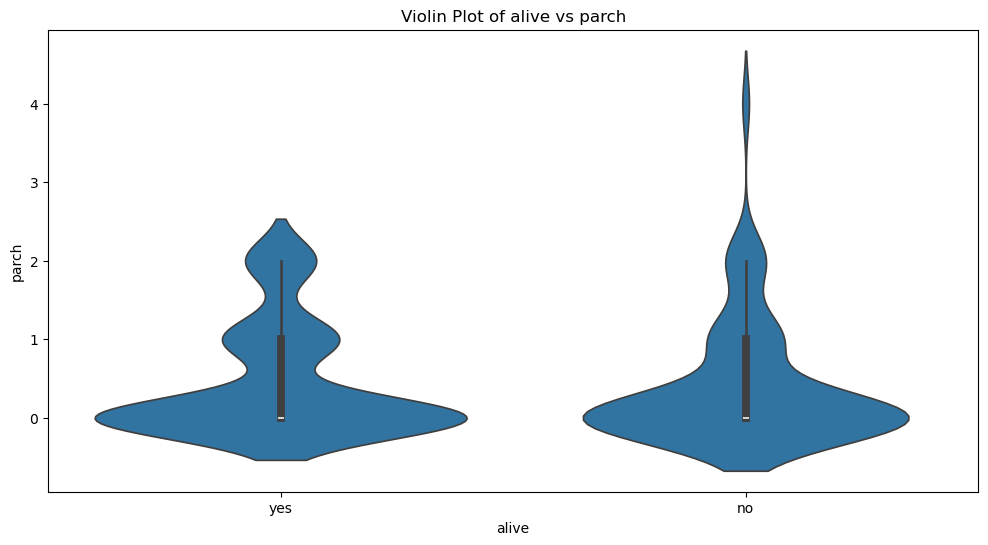

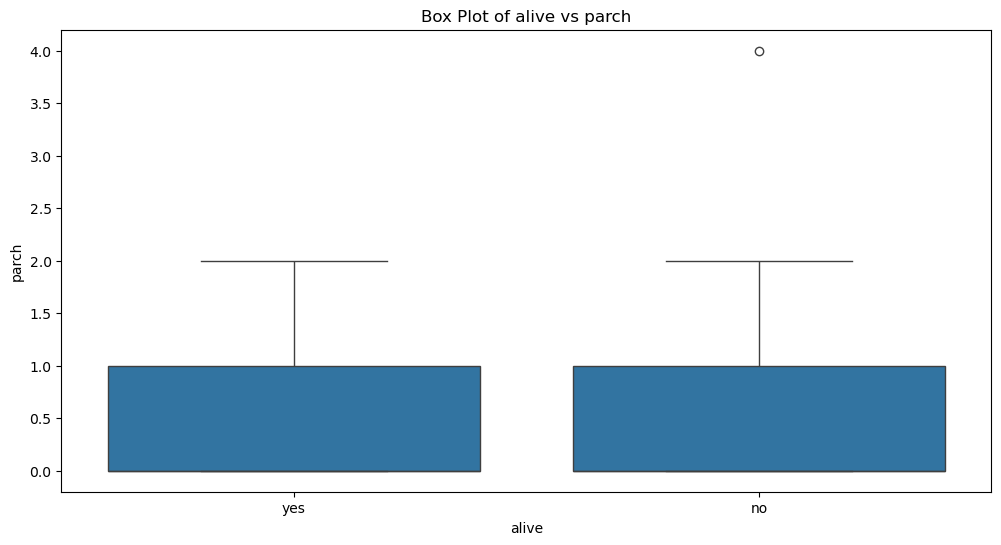

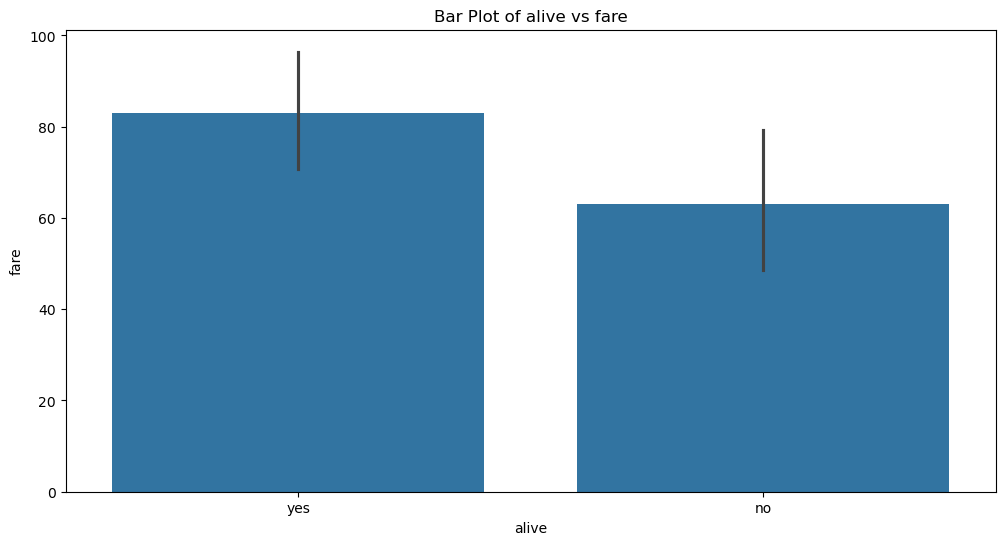

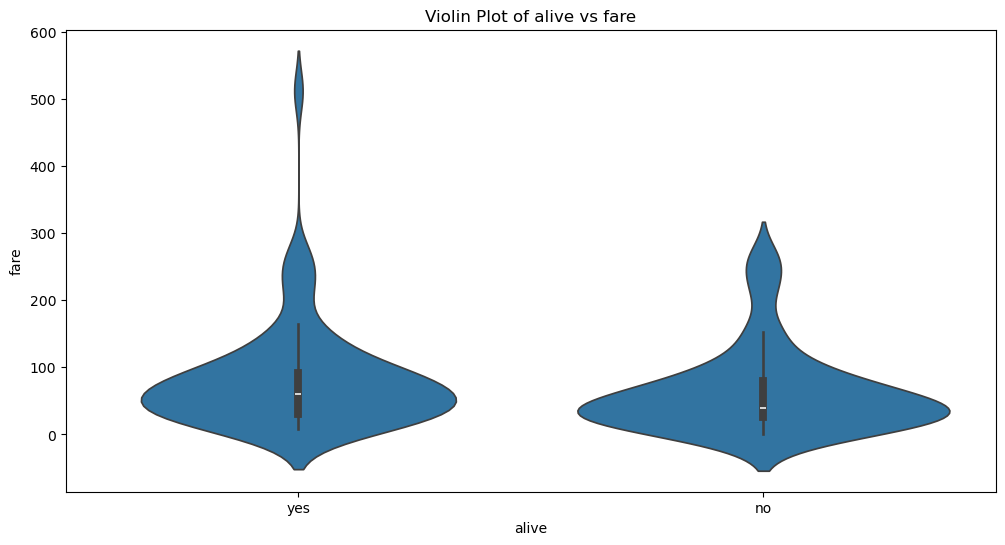

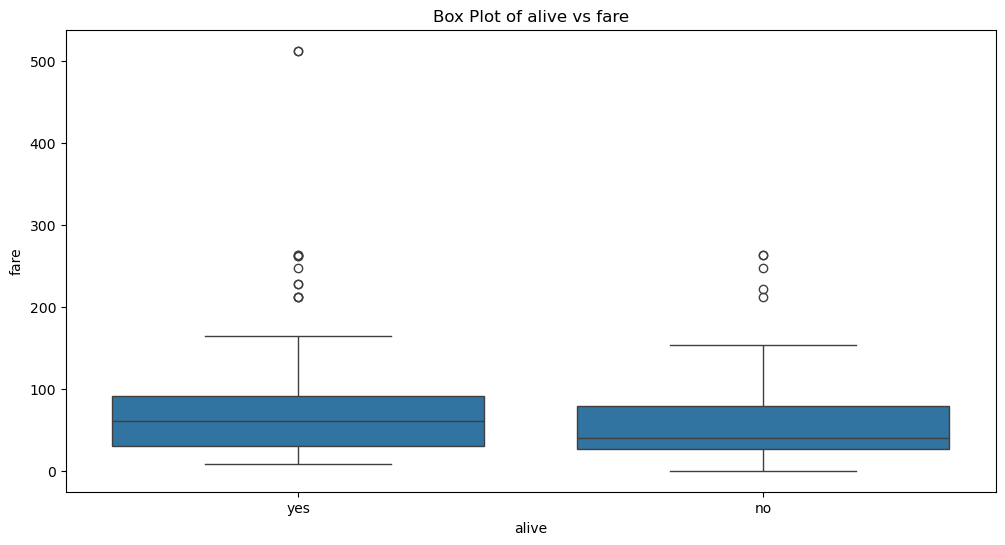

In [145]:
def plot_categorical_numerical(titanic):
    categorical = titanic.select_dtypes(include=['object']).columns
    numerical = titanic.select_dtypes(include=['float64', 'int64']).columns
    
    for cat in categorical:
        for num in numerical:
            plt.figure(figsize=(12, 6))
            sns.barplot(x=cat, y=num, data=titanic)
            plt.title(f'Bar Plot of {cat} vs {num}')
            plt.xlabel(cat)
            plt.ylabel(num)
            plt.show()
            
            plt.figure(figsize=(12, 6))
            sns.violinplot(x=cat, y=num, data=titanic)
            plt.title(f'Violin Plot of {cat} vs {num}')
            plt.xlabel(cat)
            plt.ylabel(num)
            plt.show()
            
            plt.figure(figsize=(12, 6))
            sns.boxplot(x=cat, y=num, data=titanic)
            plt.title(f'Box Plot of {cat} vs {num}')
            plt.xlabel(cat)
            plt.ylabel(num)
            plt.show()

plot_categorical_numerical(titanic)


## Multivariate Analysis

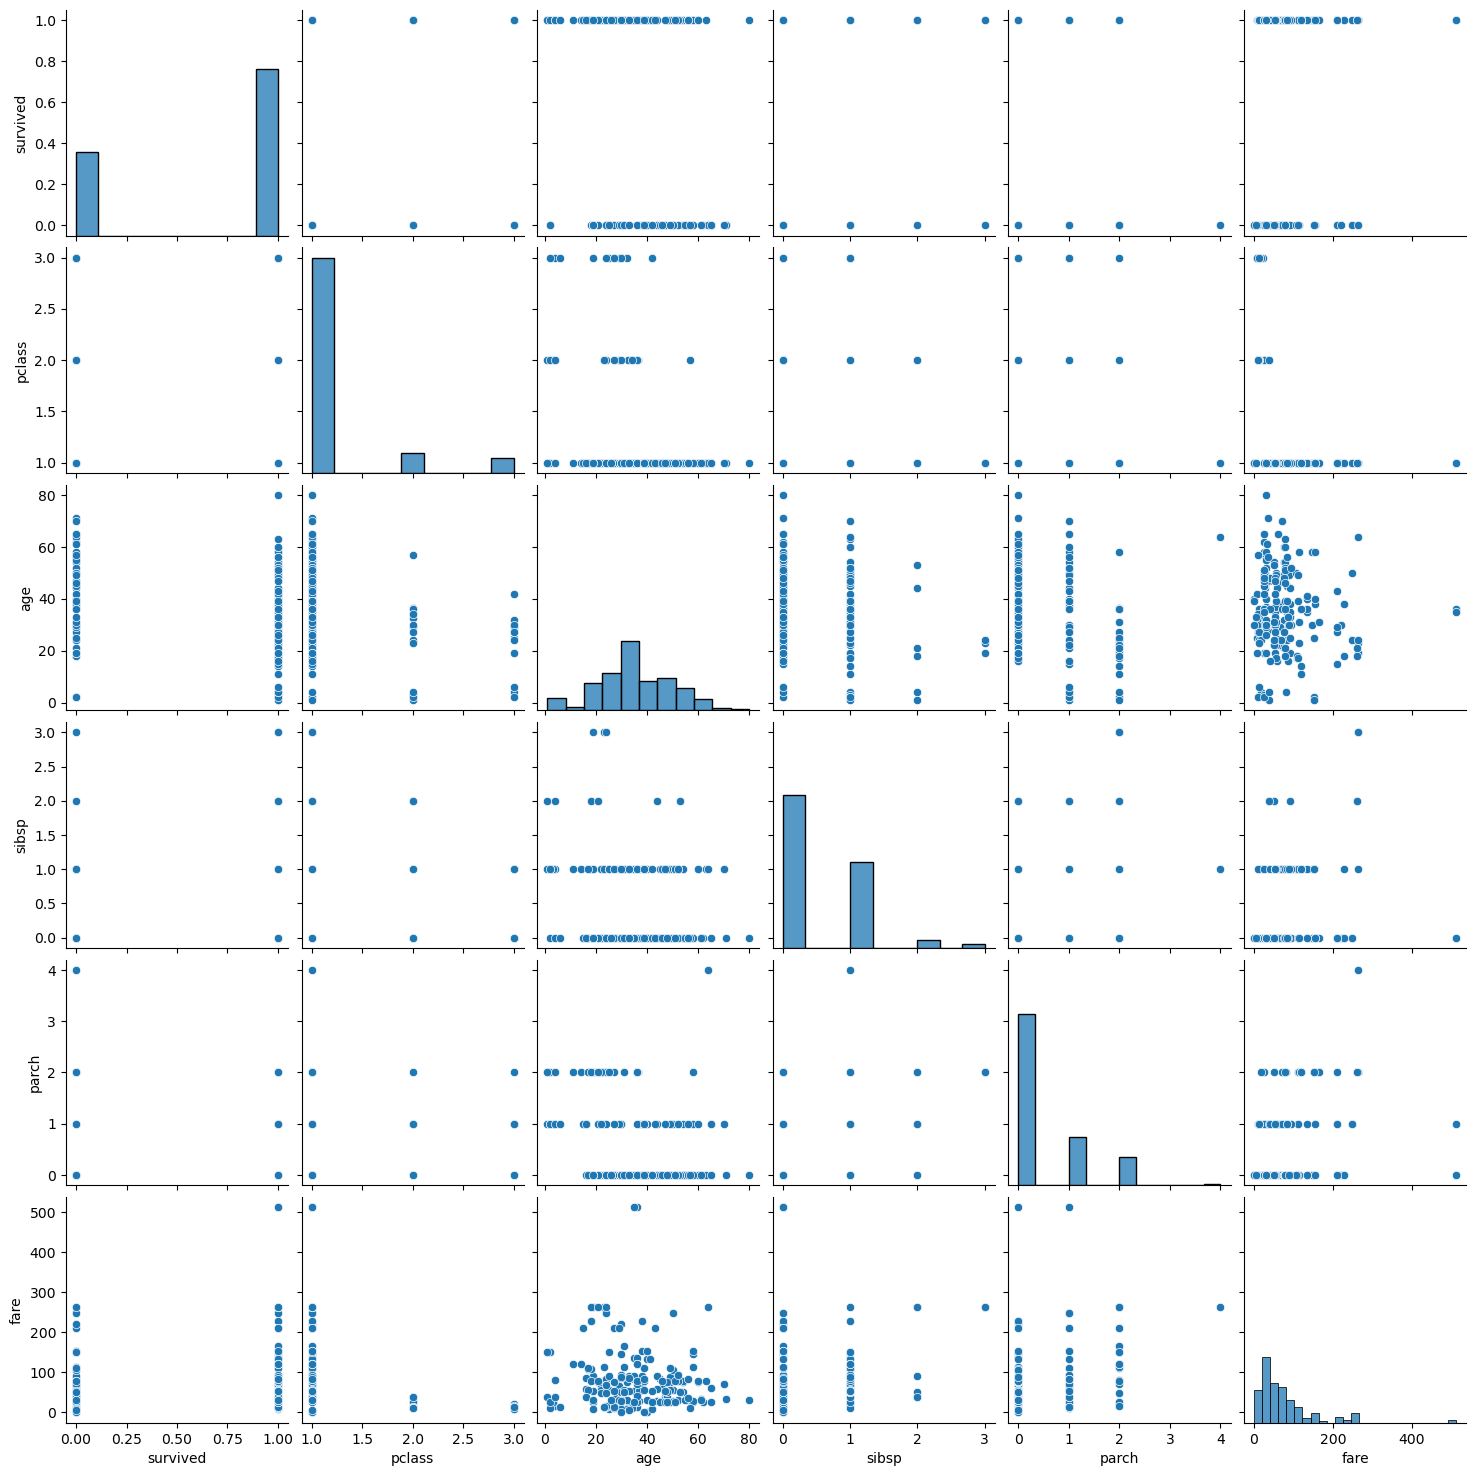

In [146]:
sns.pairplot(titanic[numerical])
plt.show()

In [147]:
correlation_matrix = titanic[numerical].corr()
print(correlation_matrix)

          survived    pclass       age     sibsp     parch      fare
survived  1.000000 -0.033313 -0.228639  0.134080  0.038467  0.125166
pclass   -0.033313  1.000000 -0.286359 -0.088438  0.055230 -0.313099
age      -0.228639 -0.286359  1.000000 -0.137873 -0.245432 -0.075026
sibsp     0.134080 -0.088438 -0.137873  1.000000  0.260784  0.290435
parch     0.038467  0.055230 -0.245432  0.260784  1.000000  0.383967
fare      0.125166 -0.313099 -0.075026  0.290435  0.383967  1.000000


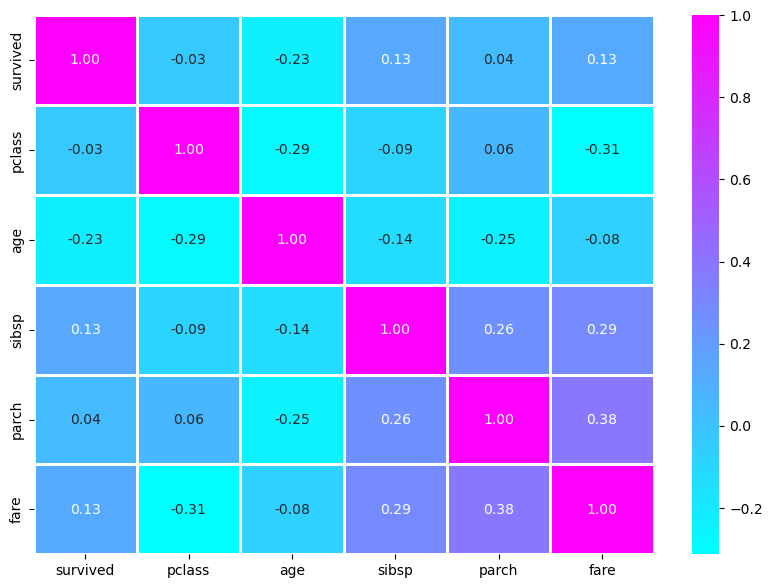

In [148]:
correlation_matrix = titanic[numerical].corr()
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='cool', fmt='.2f', linewidths=0.8)
plt.show()

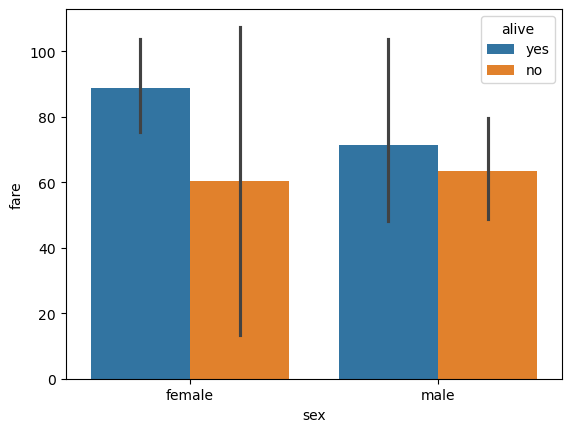

In [149]:
sns.barplot(x='sex', y='fare', hue='alive', data=titanic)

plt.show()

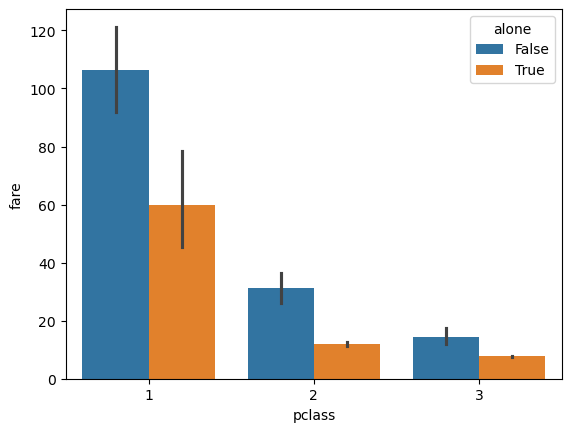

In [150]:
sns.barplot(x='pclass', y='fare', hue='alone', data=titanic)
plt.show()

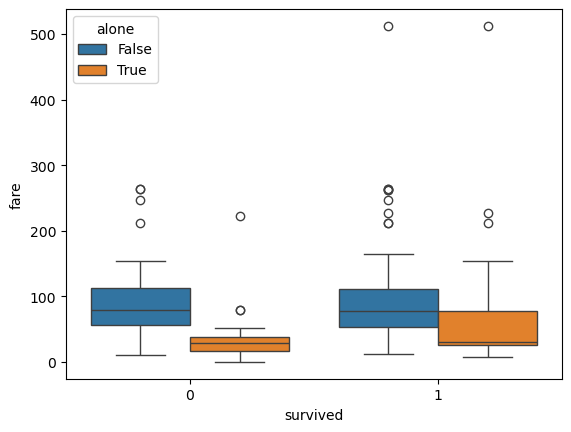

In [151]:
sns.boxplot(x='survived', y='fare', hue='alone', data=titanic)
plt.show()